In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [2]:
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]

import warnings
warnings.filterwarnings('ignore')

# **Data loading**

In [3]:
data = pd.read_csv(r'drive/MyDrive/dataset.csv', index_col=False)
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0
1,1,5047,Male,disloyal Customer,NaN,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0
2,2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1
3,3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0
4,4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,NaN,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1


In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
data.shape

(25694, 25)

In [6]:
data_dictionary = pd.read_csv(r'drive/MyDrive/data_dictionary.csv', index_col=False)
data_dictionary

,Column,Description
0,id,Passenger ID
1,Gender,"Gender of the passengers (Female, Male)"
2,Customer Type,"The customer type (Loyal customer, disloyal cu..."
3,Age,The actual age of the passengers
4,Type of Travel,Purpose of the flight of the passengers (Perso...
5,Class,Travel class in the plane of the passengers (B...
6,Flight Distance,The flight distance of this journey
7,Inflight wifi service,Satisfaction level of the inflight wifi servic...
8,Departure/Arrival time convenient,Satisfaction level of Departure/Arrival time c...
9,Ease of Online booking,Satisfaction level of online booking


In [7]:
data_dtypes = pd.DataFrame(data.dtypes,columns=['dtypes'])
data_dtypes = data_dtypes.reset_index()
data_dtypes['Column'] = data_dtypes['index']
data_dtypes = data_dtypes[['Column','dtypes']]

data_dtypes['first value'] = data.loc[0].values
preview = data_dtypes.merge(data_dictionary, on='Column',how='left')
preview.drop(index=preview.index[0], axis=0, inplace=True)
print(preview)

                               Column   dtypes      first value                                        Description
1                                  id    int64            70172                                       Passenger ID
2                              Gender   object             Male            Gender of the passengers (Female, Male)
3                       Customer Type   object   Loyal Customer  The customer type (Loyal customer, disloyal cu...
4                                 Age  float64             13.0                   The actual age of the passengers
5                      Type of Travel   object  Personal Travel  Purpose of the flight of the passengers (Perso...
6                               Class   object         Eco Plus  Travel class in the plane of the passengers (B...
7                     Flight Distance  float64            460.0                The flight distance of this journey
8               Inflight wifi service  float64              3.0  Satisfaction le

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25694 entries, 0 to 25693
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25694 non-null  int64  
 1   id                                 25694 non-null  int64  
 2   Gender                             25691 non-null  object 
 3   Customer Type                      25692 non-null  object 
 4   Age                                25684 non-null  float64
 5   Type of Travel                     25687 non-null  object 
 6   Class                              25684 non-null  object 
 7   Flight Distance                    25679 non-null  float64
 8   Inflight wifi service              25689 non-null  float64
 9   Departure/Arrival time convenient  25683 non-null  float64
 10  Ease of Online booking             25681 non-null  float64
 11  Gate location                      25682 non-null  flo

In [69]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25694.000000,25694.000000,25684.000000,25679.000000,25689.000000,25683.000000,25681.000000,25682.000000,25684.000000,25682.000000,25687.000000,25680.000000,25684.000000,25683.000000,25685.000000,25688.000000,25684.000000,25689.000000,25683.000000,25631.000000,25694.000000
mean,12846.500000,64718.583483,39.220410,1191.151018,2.735334,3.060818,2.757681,2.968149,3.208418,3.245542,3.436719,3.357671,3.377901,3.341393,3.634300,3.309522,3.641022,3.287789,14.818869,15.232570,0.438312
std,7417.363244,37422.711871,15.088075,1001.600300,1.332428,1.532340,1.400003,1.285225,1.334802,1.349971,1.319463,1.332636,1.285298,1.313826,1.180125,1.265108,1.178666,1.317116,37.351052,37.939854,0.496190
min,0.000000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6423.250000,32294.500000,27.000000,411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,12846.500000,64441.000000,40.000000,838.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,19269.750000,97103.750000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000,1.000000
max,25693.000000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000


In [9]:
num_columns = [col for col in data.columns if data[col].dtype != 'object' and col not in  ['Unnamed: 0', 'id', 'satisfaction']]
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

## **Data visualizing**

Let's print unique values in each columns

In [10]:
for column_name in data.columns:
  print('--{}--\n'.format(column_name))
  print(data[column_name].unique(), '\n\n')

--Unnamed: 0--

[    0     1     2 ... 25691 25692 25693] 


--id--

[ 70172   5047 110028 ...  50484  71121 100433] 


--Gender--

['Male' 'Female' nan] 


--Customer Type--

['Loyal Customer' 'disloyal Customer' nan] 


--Age--

[13. nan 26. 25. 61. 47. 52. 41. 20. 24. 12. 53. 33. 45. 38.  9. 17. 43.
 58. 57. 49. 36. 22. 31. 15. 35. 67. 37. 40. 34. 39. 50. 29. 54. 21. 28.
 27. 69. 60. 23. 48. 59. 46. 30. 66. 64. 44. 51. 32. 19. 42. 16. 11. 62.
  8. 56. 68. 55. 18. 65. 72. 70. 63. 10.  7. 14. 80. 74. 71. 85. 73. 76.
 77. 75. 79. 78.] 


--Type of Travel--

['Personal Travel' 'Business travel' nan] 


--Class--

['Eco Plus' 'Business' nan 'Eco'] 


--Flight Distance--

[ 460.  235. 1142. ... 1887. 3105. 2953.] 


--Inflight wifi service--

[ 3.  2.  4.  1.  5.  0. nan] 


--Departure/Arrival time convenient--

[ 4.  2.  5.  3.  1.  0. nan] 


--Ease of Online booking--

[ 3.  2.  5.  4.  1.  0. nan] 


--Gate location--

[ 1.  3.  2.  5. nan  4.] 


--Food and drink--

[ 5.  1.  2.  4.

Let's visualize our numerical columns

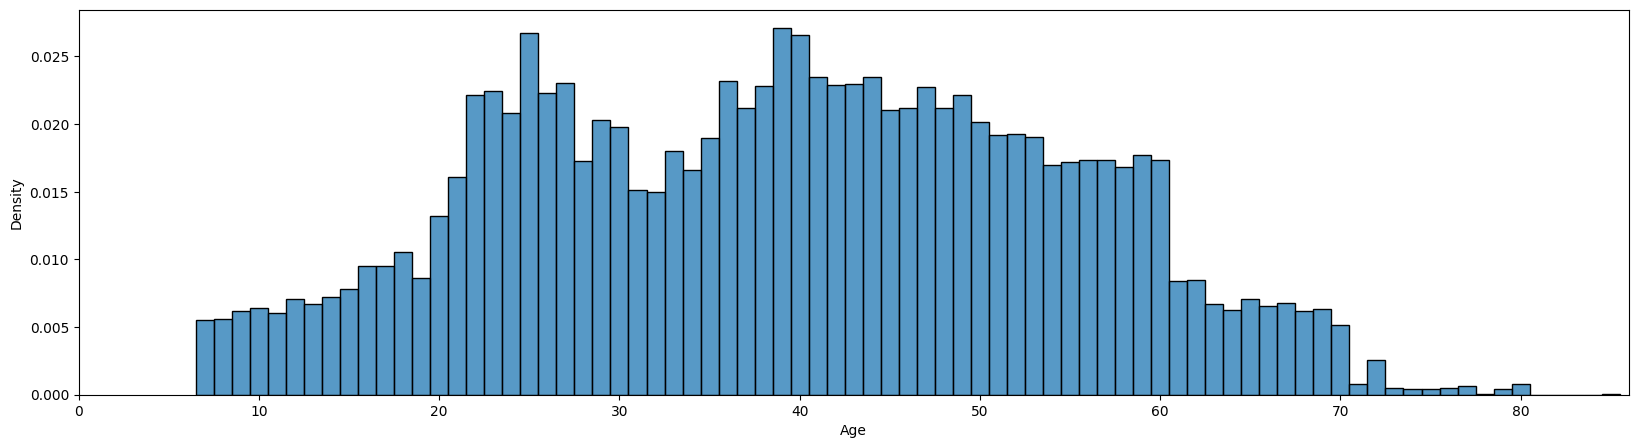

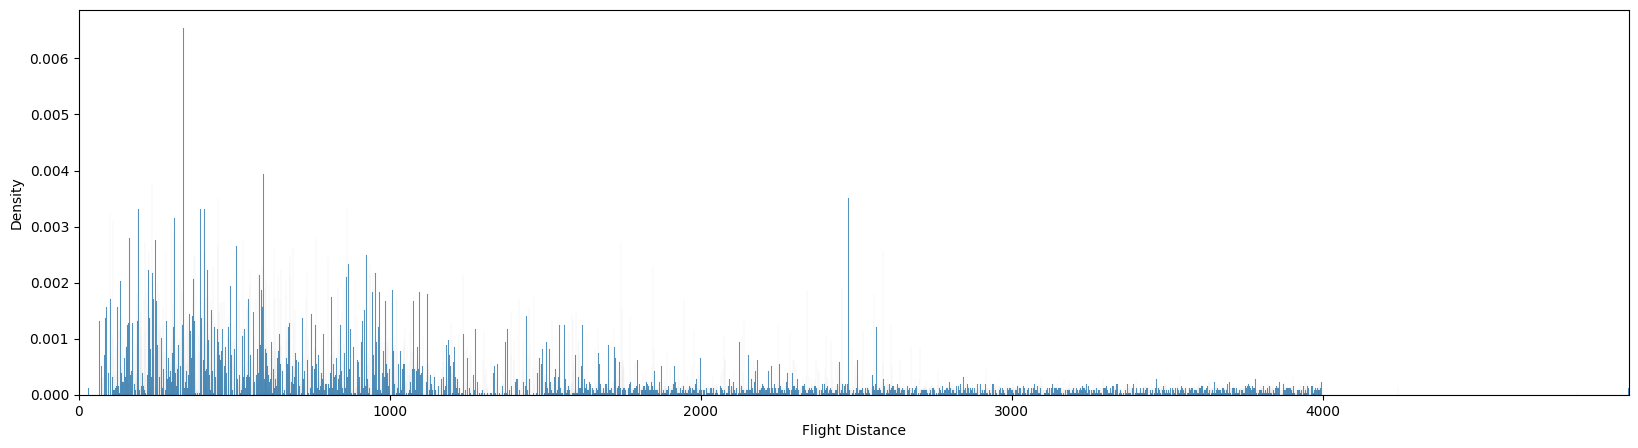

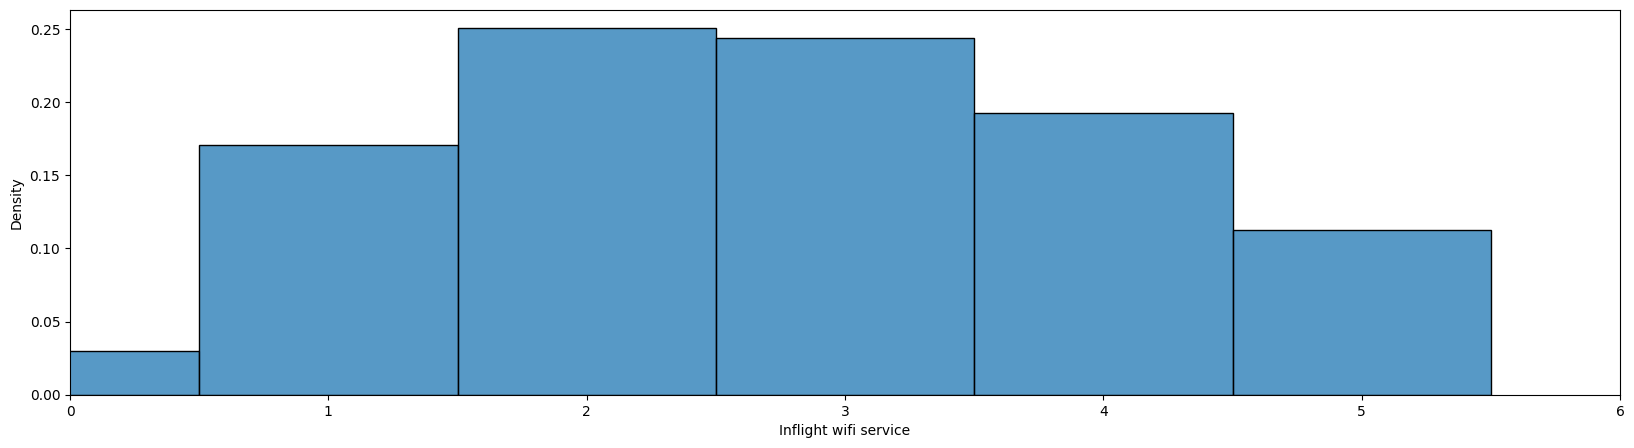

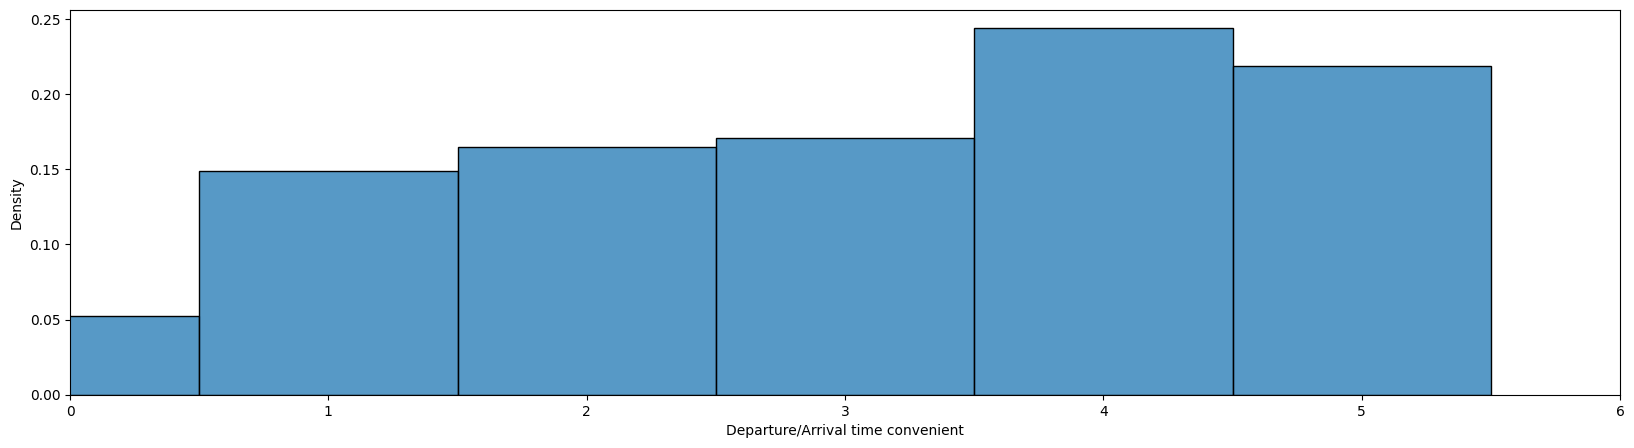

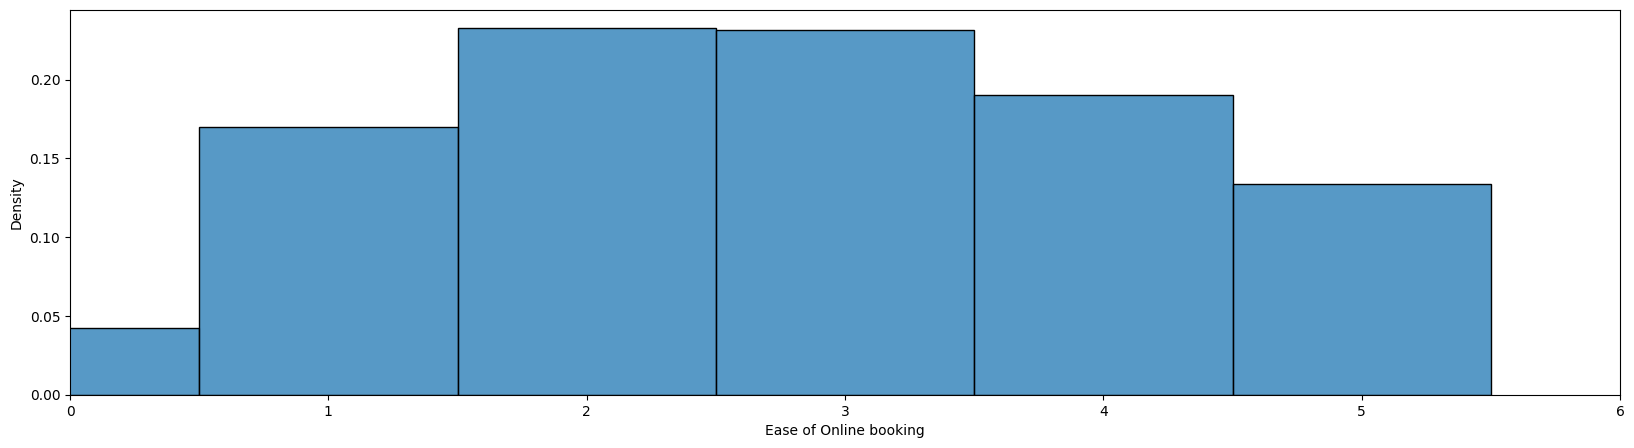

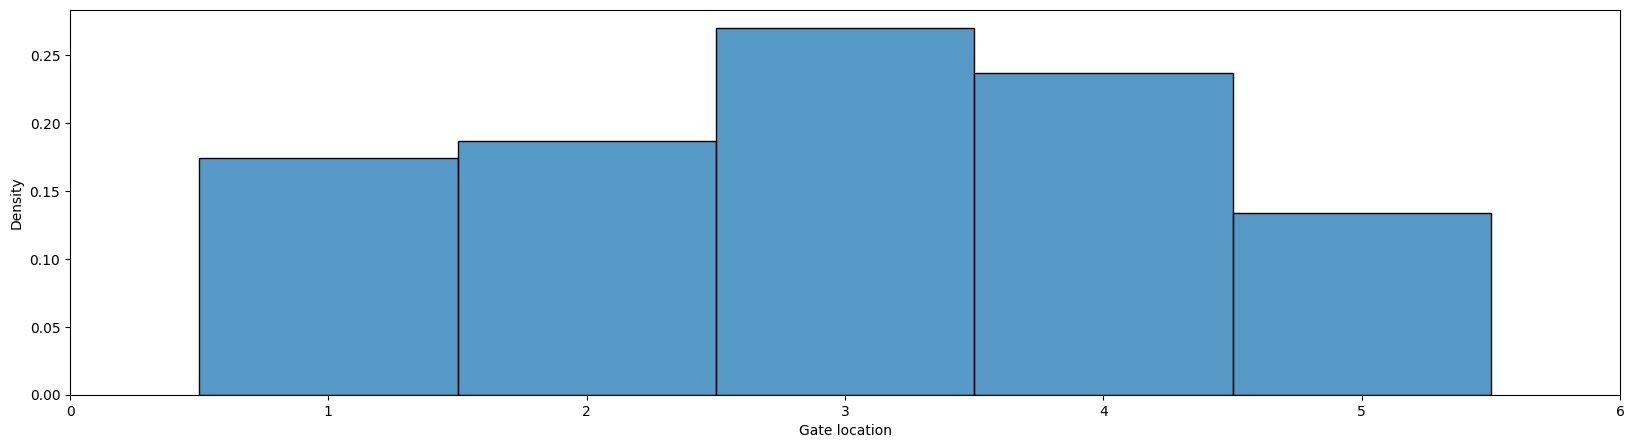

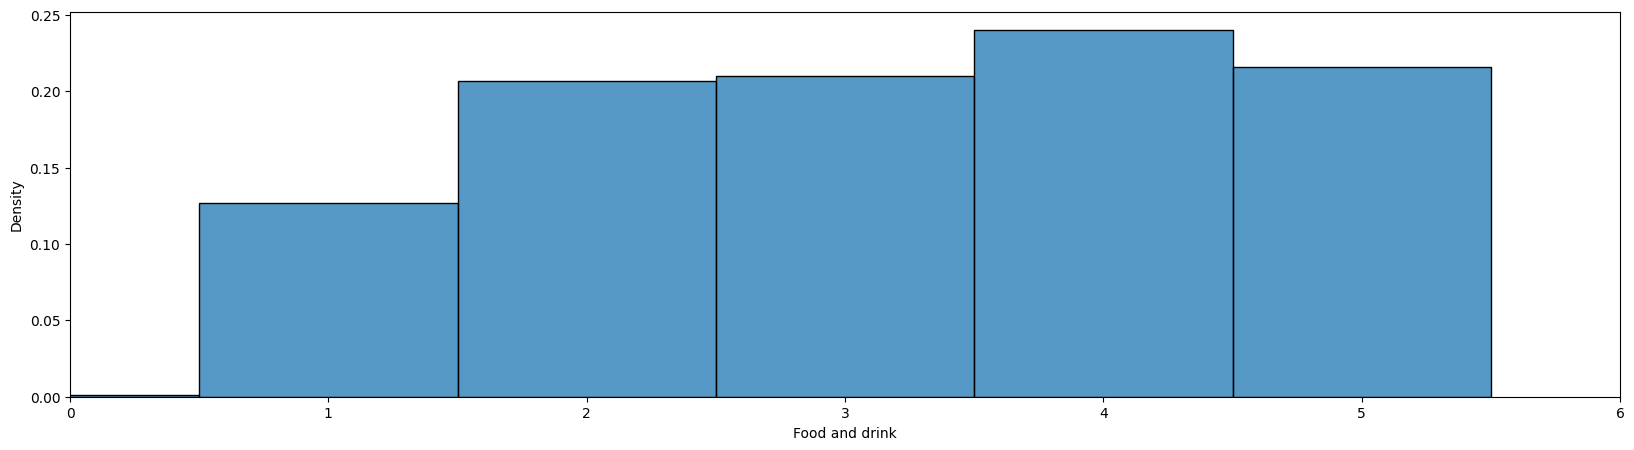

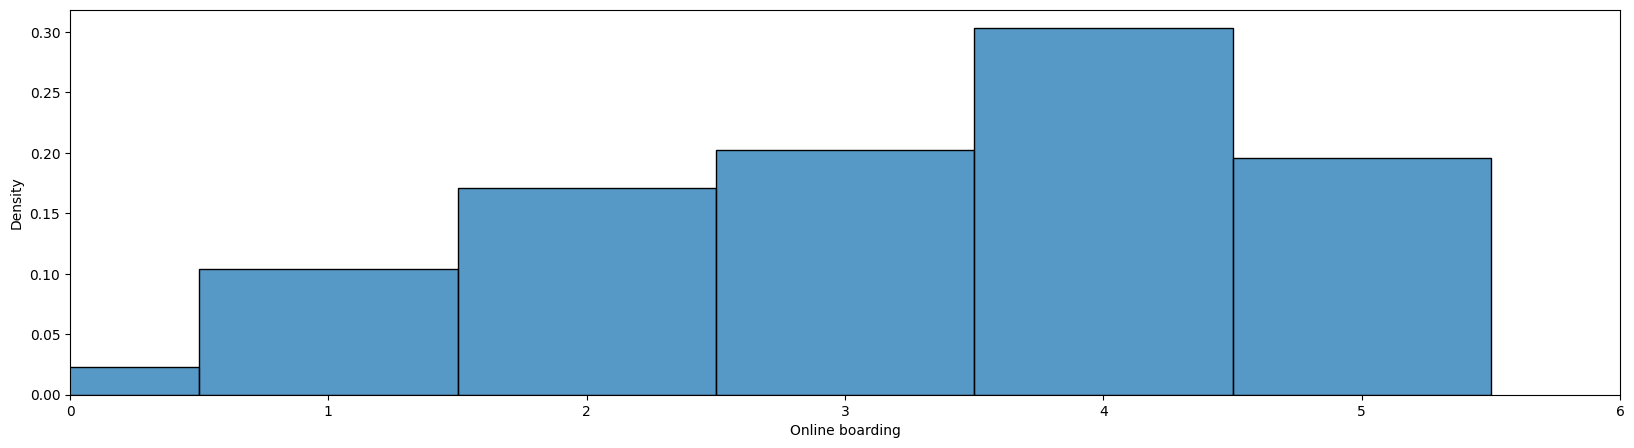

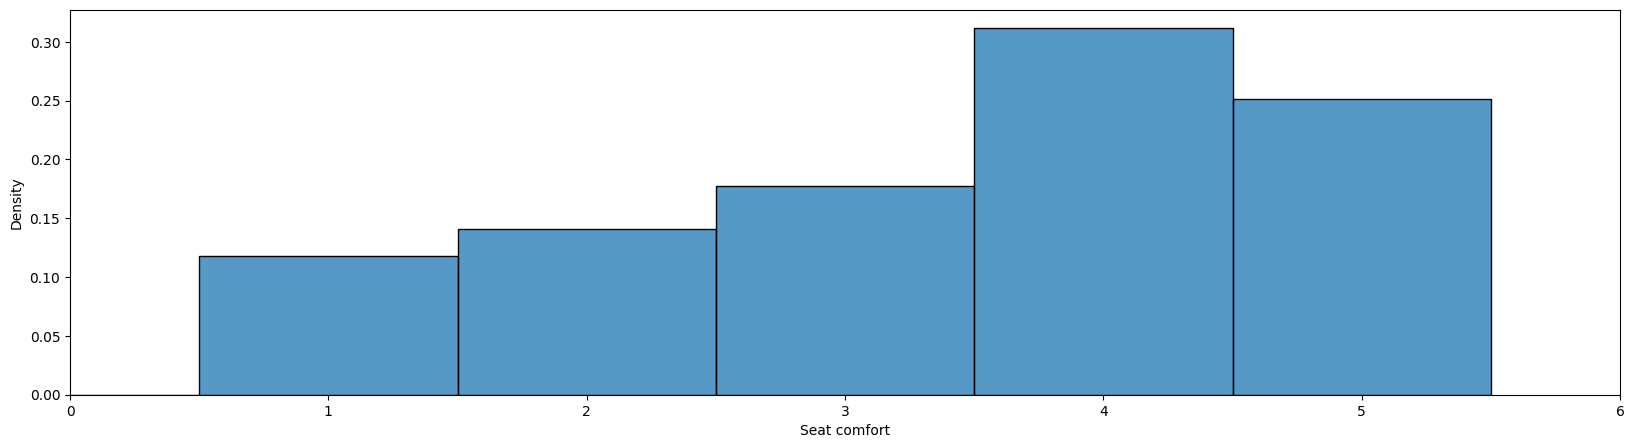

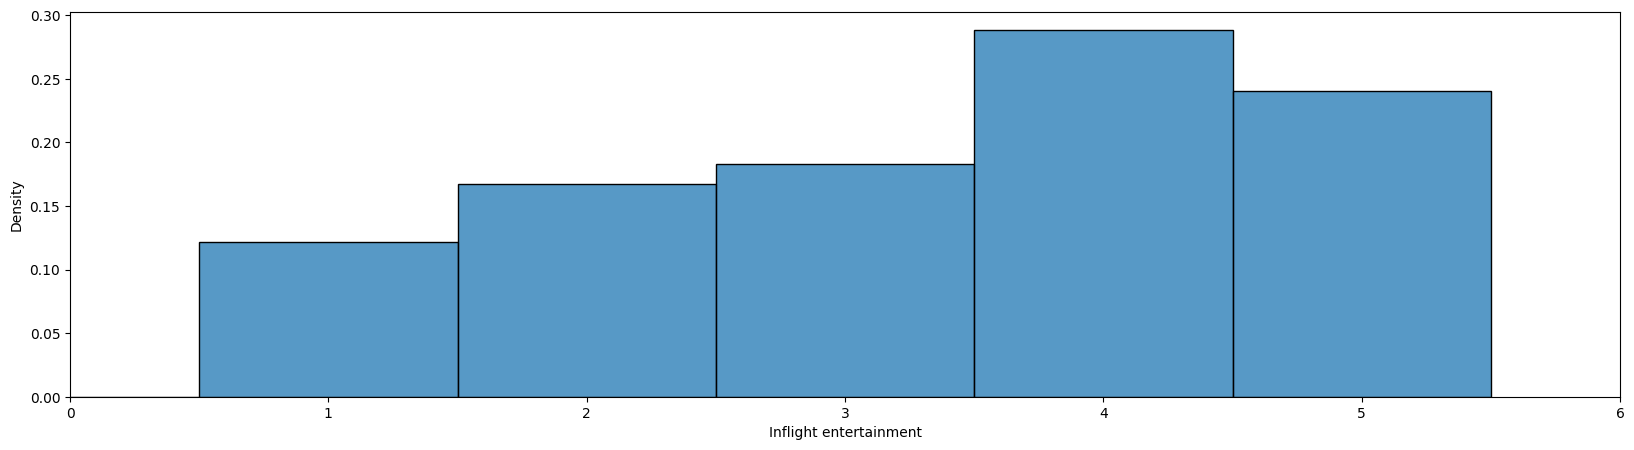

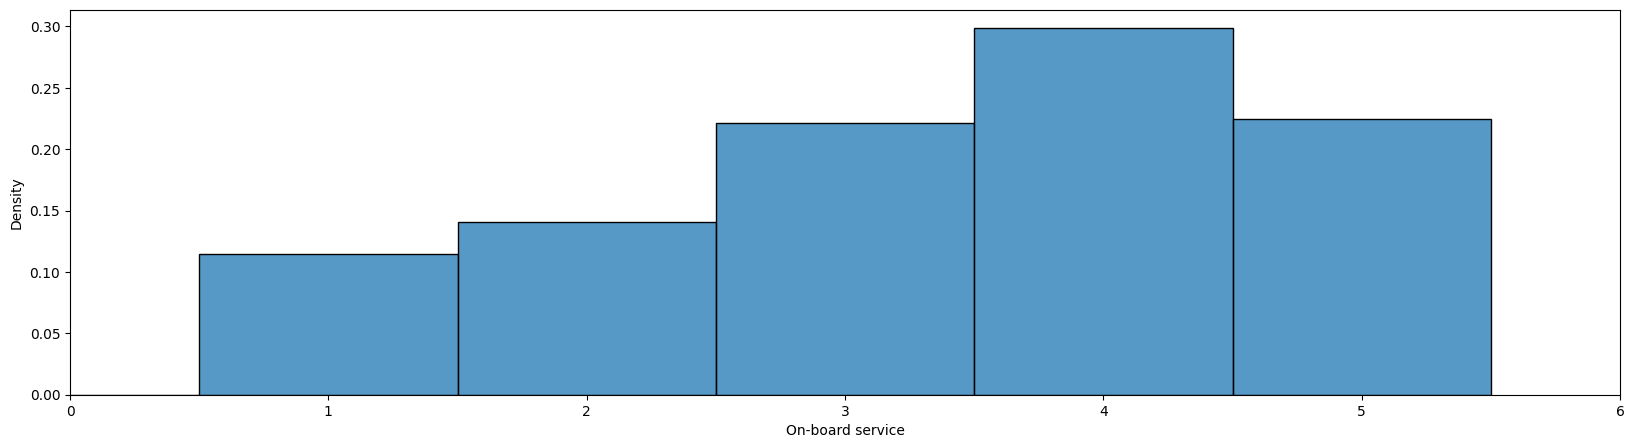

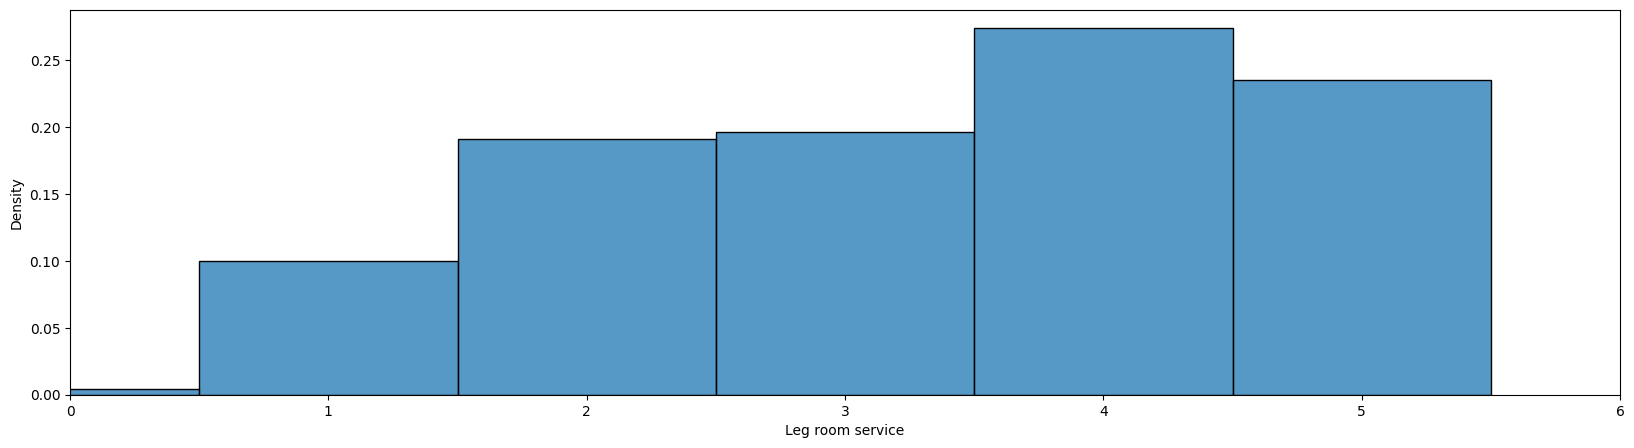

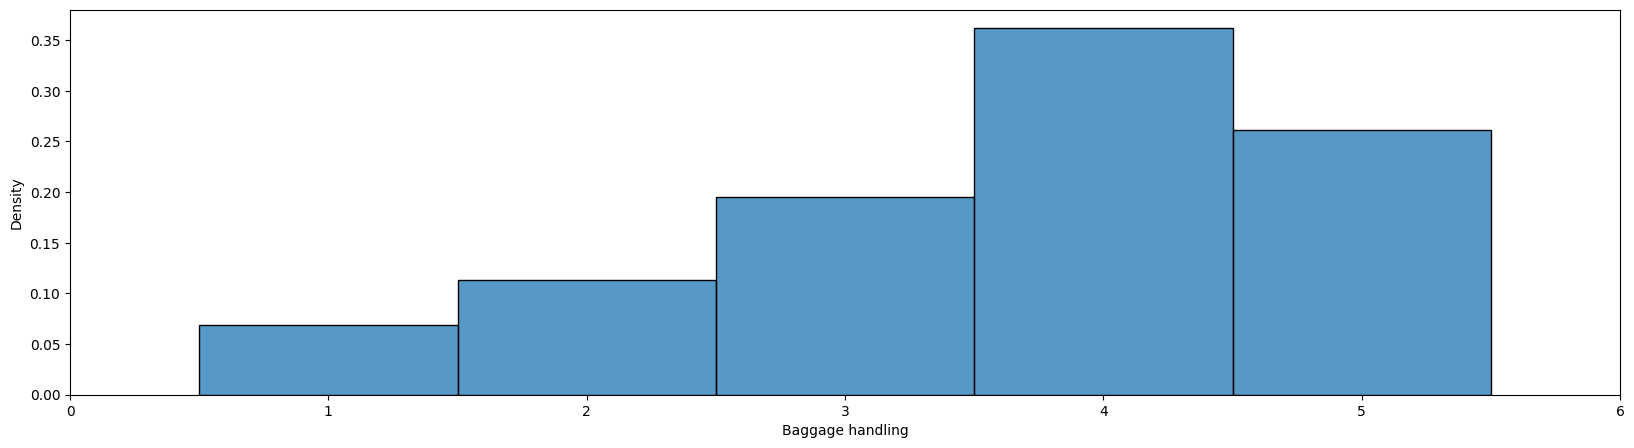

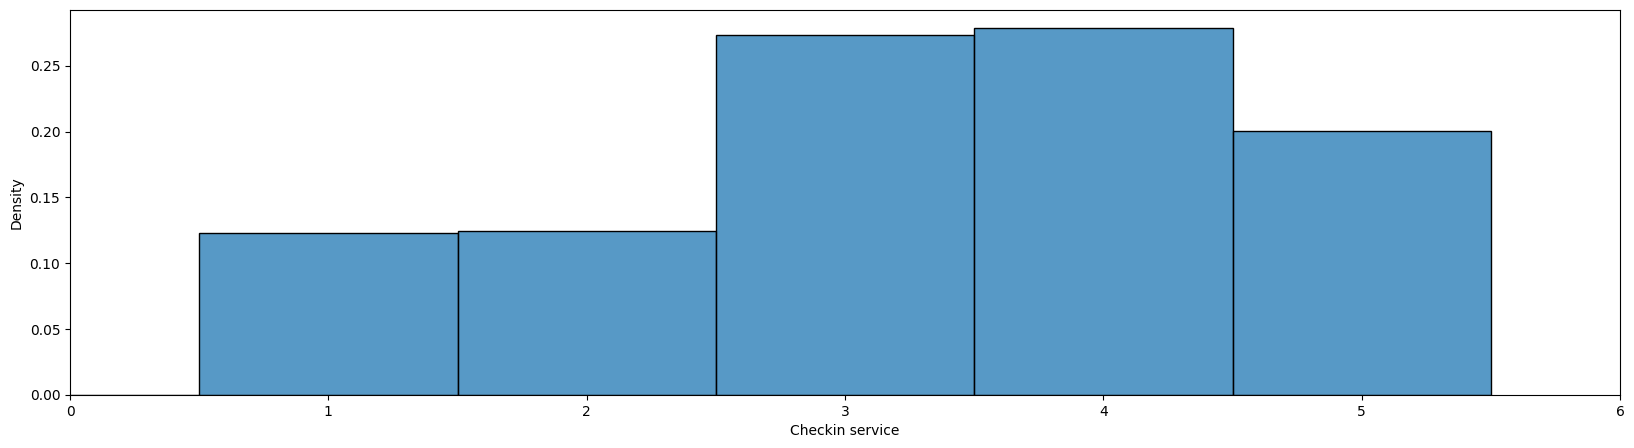

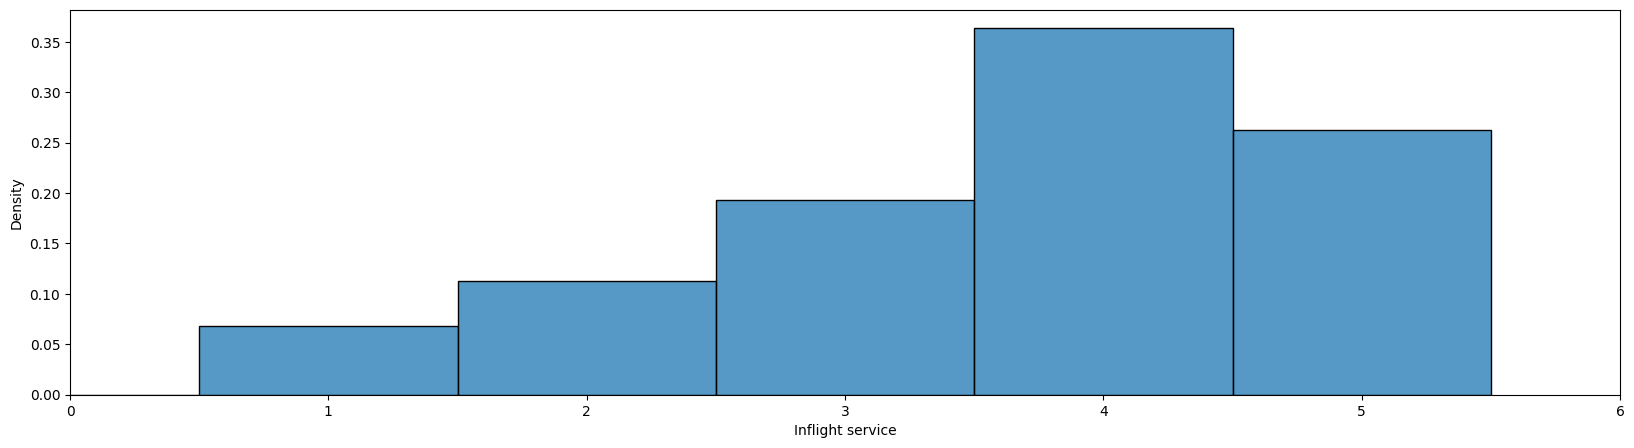

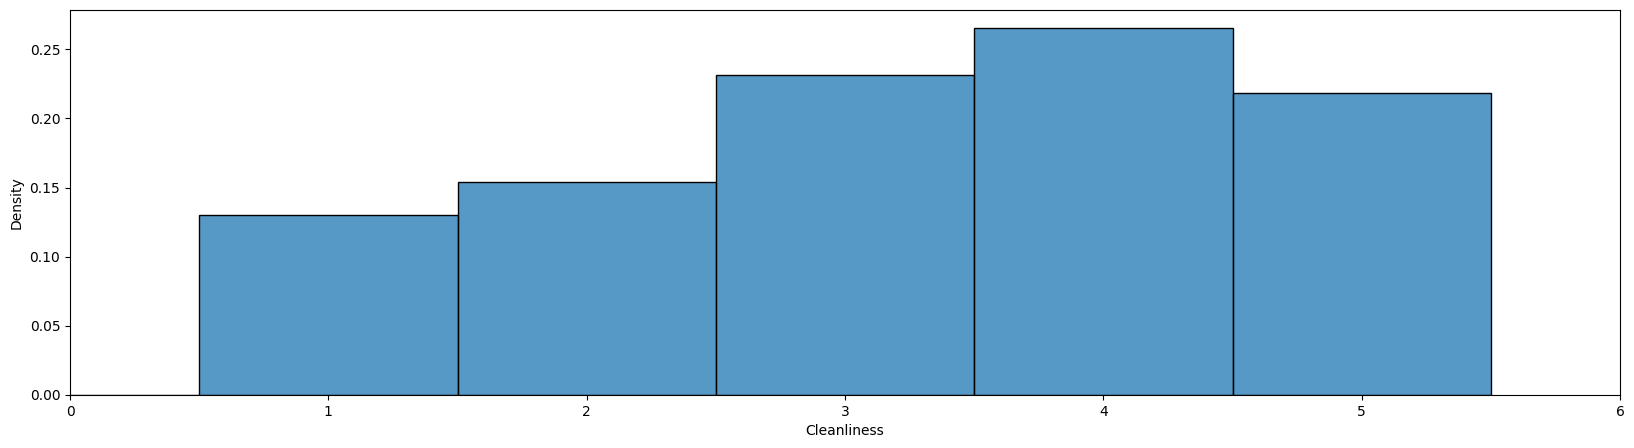

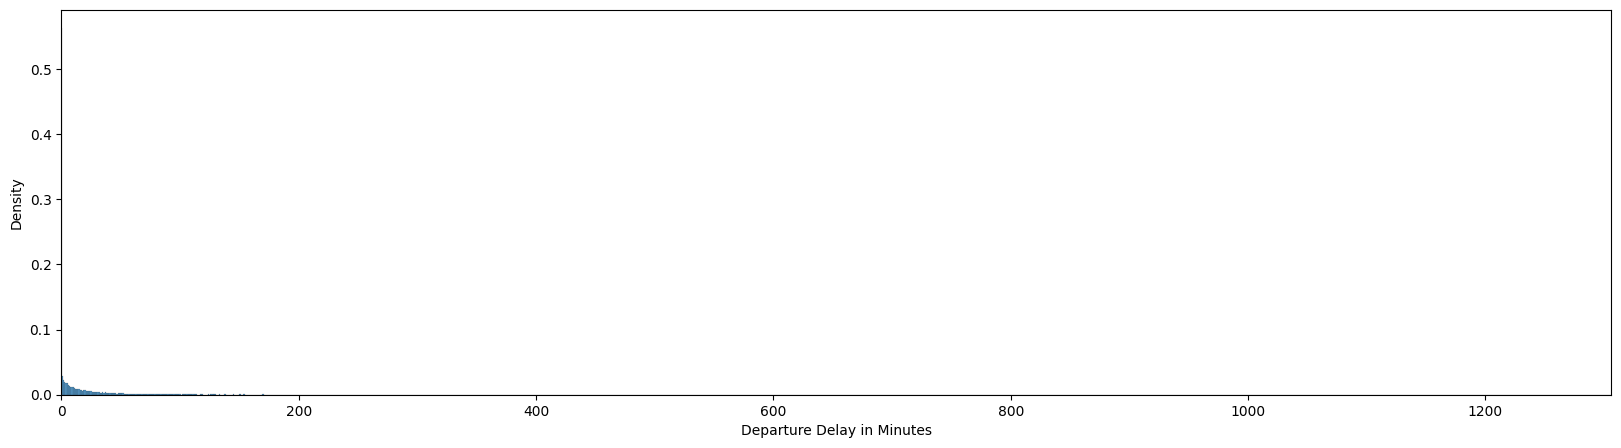

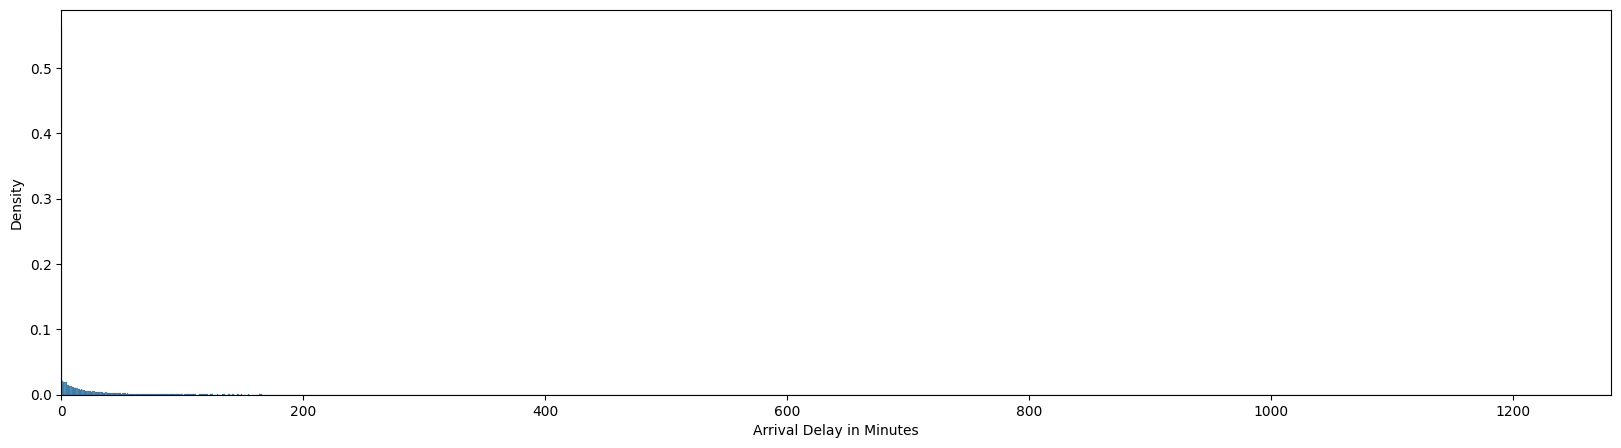

In [11]:
for col in num_columns:
  d = sns.histplot(data=data[col], bins=3, discrete=True, stat='density')
  d.set(xlim=(0, data[col].max() + 1))
  plt.show()

Let's visualize our caterogical columns

--Gender-- 



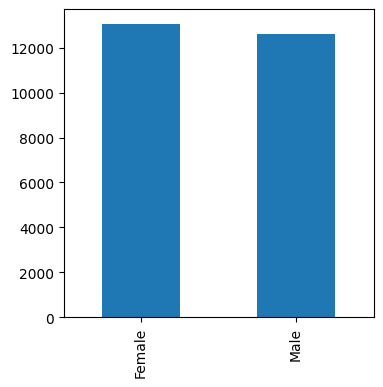


--Customer Type-- 



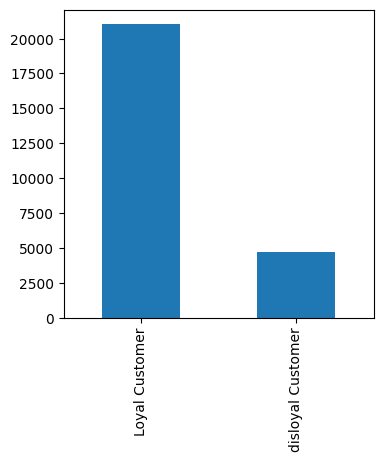


--Type of Travel-- 



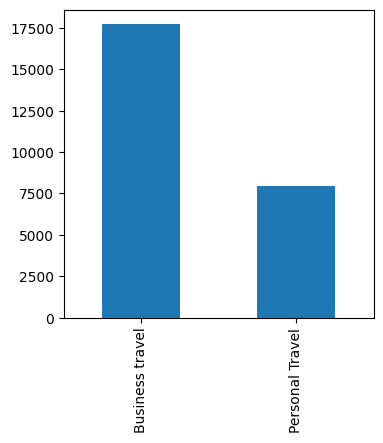


--Class-- 



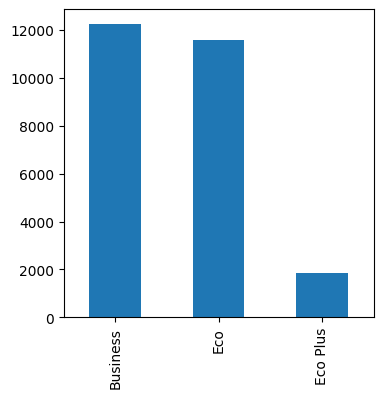

In [12]:
for col in cat_columns:
  print('--{}--'.format(col), '\n')
  ax = data[col].value_counts().plot(kind="bar", figsize=(4,4))
  plt.show()
  print()

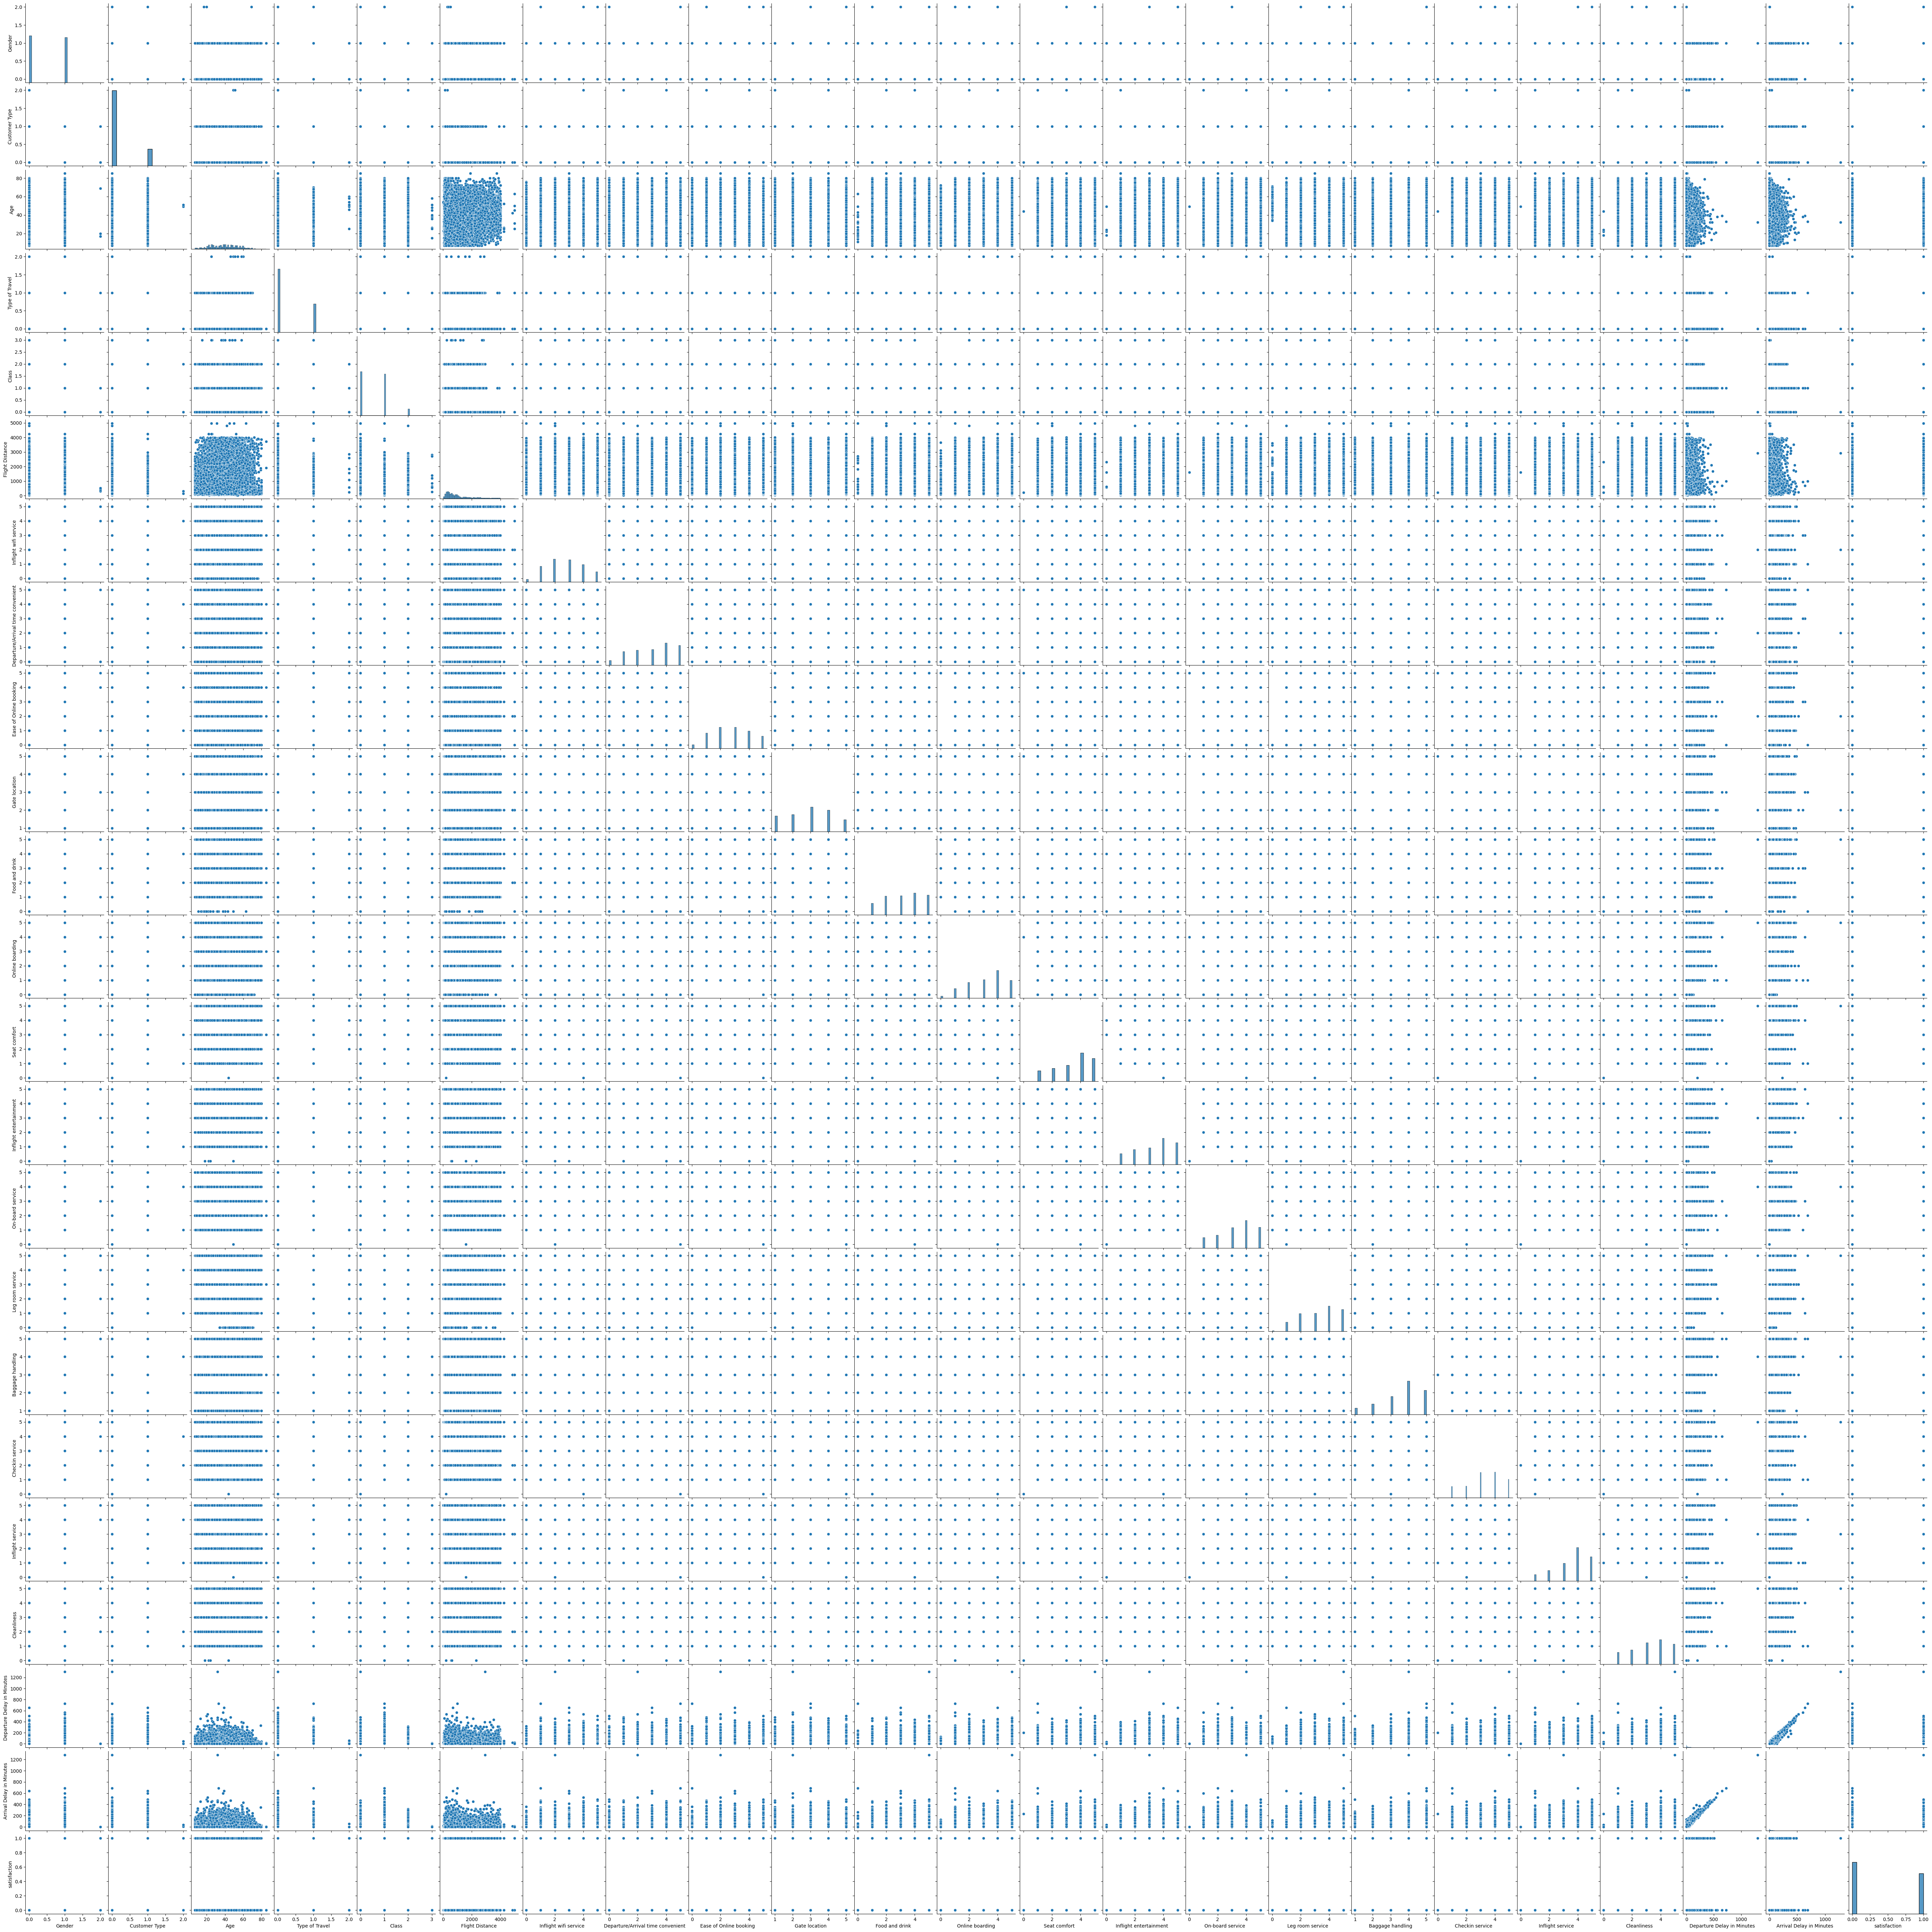

In [13]:
from sklearn.preprocessing import LabelEncoder
df = data.copy(deep=True).drop(columns=['Unnamed: 0', 'id'])

labelencoder=LabelEncoder()
for column in cat_columns + ['satisfaction']:
    df[column] = labelencoder.fit_transform(df[column])
sns.pairplot(df)

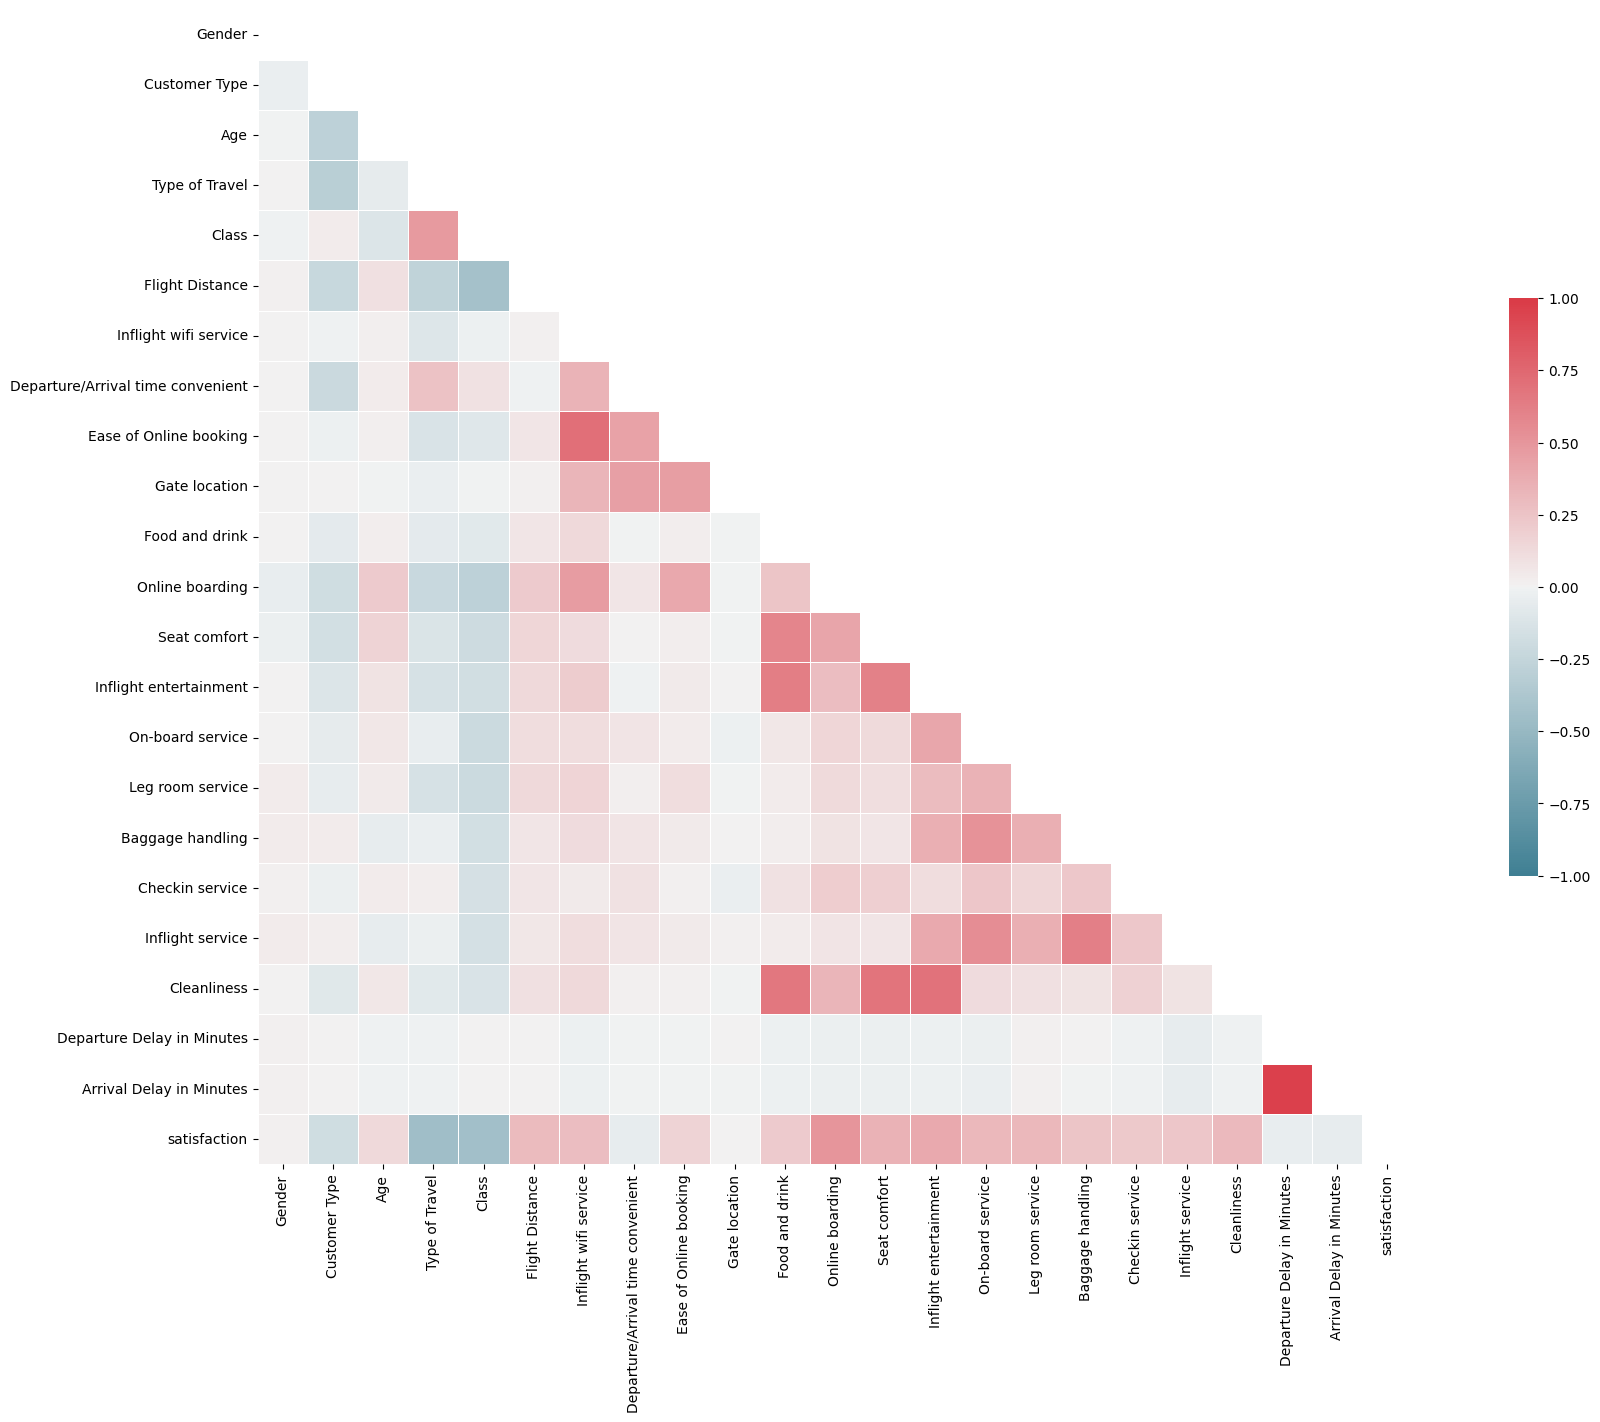

In [14]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [15]:
corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.034219,-0.004360,0.006284,-0.014566,0.010224,0.006111,0.002430,0.000799,0.000711,0.003231,-0.039634,-0.030883,0.007105,0.003053,0.034385,0.036701,0.009607,0.035614,0.007275,0.010962,0.008271,0.010134
Customer Type,-0.034219,1.000000,-0.281558,-0.307512,0.035722,-0.228799,-0.007861,-0.214646,-0.018755,0.006722,-0.067916,-0.186739,-0.164080,-0.116463,-0.061272,-0.051466,0.032414,-0.030947,0.028229,-0.091470,0.004810,0.003962,-0.182520
Age,-0.004360,-0.281558,1.000000,-0.057687,-0.116427,0.095247,0.018581,0.036656,0.022327,-0.005800,0.028422,0.211930,0.169279,0.079242,0.056529,0.041960,-0.050016,0.038986,-0.050991,0.060669,-0.009147,-0.009525,0.136449
Type of Travel,0.006284,-0.307512,-0.057687,1.000000,0.482910,-0.268624,-0.107949,0.265260,-0.131891,-0.034184,-0.065376,-0.223867,-0.122953,-0.147925,-0.046290,-0.143239,-0.031457,0.027210,-0.023472,-0.079401,-0.012170,-0.010742,-0.450071
Class,-0.014566,0.035722,-0.116427,0.482910,1.000000,-0.429577,-0.022994,0.090798,-0.096286,-0.007028,-0.078799,-0.288311,-0.201059,-0.176770,-0.209101,-0.205032,-0.166211,-0.151515,-0.160279,-0.125422,0.002459,0.006451,-0.440052
Flight Distance,0.010224,-0.228799,0.095247,-0.268624,-0.429577,1.000000,0.011543,-0.015449,0.069066,0.008117,0.063074,0.211873,0.150285,0.132914,0.111524,0.132880,0.066311,0.064401,0.059113,0.097492,0.005424,0.001008,0.300874
Inflight wifi service,0.006111,-0.007861,0.018581,-0.107949,-0.022994,0.011543,1.000000,0.340540,0.708345,0.335489,0.133227,0.461925,0.122590,0.207658,0.116502,0.162177,0.118838,0.041037,0.110027,0.134569,-0.015891,-0.017984,0.287584
Departure/Arrival time convenient,0.002430,-0.214646,0.036656,0.265260,0.090798,-0.015449,0.340540,1.000000,0.437228,0.447720,-0.005850,0.068183,0.002777,-0.008742,0.071209,0.019884,0.072176,0.088537,0.075454,0.011892,-0.001282,-0.003215,-0.054522
Ease of Online booking,0.000799,-0.018755,0.022327,-0.131891,-0.096286,0.069066,0.708345,0.437228,1.000000,0.458921,0.023783,0.400226,0.023684,0.043191,0.037919,0.113908,0.041494,0.008294,0.041691,0.015295,-0.001277,-0.003494,0.171432
Gate location,0.000711,0.006722,-0.005800,-0.034184,-0.007028,0.008117,0.335489,0.447720,0.458921,1.000000,-0.006969,-0.000940,-0.006316,0.005742,-0.021424,-0.003042,0.004944,-0.034688,0.013091,-0.006292,0.001397,-0.000177,0.002722


# **Data preprocessing**

In [16]:
data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                3
Customer Type                         2
Age                                  10
Type of Travel                        7
Class                                10
Flight Distance                      15
Inflight wifi service                 5
Departure/Arrival time convenient    11
Ease of Online booking               13
Gate location                        12
Food and drink                       10
Online boarding                      12
Seat comfort                          7
Inflight entertainment               14
On-board service                     10
Leg room service                     11
Baggage handling                      9
Checkin service                       6
Inflight service                     10
Cleanliness                           5
Departure Delay in Minutes           11
Arrival Delay in Minutes             63
satisfaction                          0


Let's build our preprocessing pipeline

**Numerical pipeline**

In [17]:
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ('standardscaler', StandardScaler()),
    ])

**Categorical pipeline**

In [18]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
        ("standardscaler", StandardScaler())
    ])

**Connect them in preprocessing pipeline**

In [19]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, num_columns),
        ("cat_pipeline", cat_pipeline, cat_columns),
        ],
        remainder="drop",
    )

# **Modelling**

List of used models:
 - Logistic Regression
 - Linear SVC
 - SVM with poly kernel
 - SVM with rbf kernel
 - K-Nearest Neighbors
 - Decision Tree
 - Random Forest
 - BaggingClassifier
 - Ada Boost
 - Gradient Boosting


In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost

**Splitting data into training and testing sets**

In [21]:
X = data.loc[:, data.columns != 'satisfaction']
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20555, 24) (20555,)
(5139, 24) (5139,)


**Defining stratified kfold**

In [22]:
kfold = StratifiedKFold(n_splits=5)

**LogisticRegression**

In [23]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression(n_jobs=-1))
    ])

param_grid_1 = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}

grid_1 = GridSearchCV(pipe, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)

{'classifier__C': 0.1, 'classifier__penalty': 'l2'}
0.8740452444660667


**Linear SVC**

In [24]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LinearSVC())
    ])

param_grid_2 = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1]
}

grid_2 = GridSearchCV(pipe, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}
0.8727803454147409


**SVM with poly kernel**

In [25]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='poly', max_iter = 50000))
    ])

param_grid_3 = {
    'classifier__C': [0.1, 1, 10],
    'classifier__coef0': [0.1, 1, 10],
    'classifier__degree': [1, 2, 3, 4]
}

grid_3 = GridSearchCV(pipe, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print(grid_3.best_score_)

{'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 4}
0.9442471418146436


**SVM with rbf kernel**

In [26]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf'))
    ])

param_grid_4 = {
    'classifier__C': [0.1, 1, 10],
    'classifier__coef0': [0.1, 1, 10],
    'classifier__degree': [1, 2, 3, 4]
}

grid_4 = GridSearchCV(pipe, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
print(grid_4.best_score_)

{'classifier__C': 10, 'classifier__coef0': 0.1, 'classifier__degree': 1}
0.9459012405740695


**KNeighborsClassifier**

In [27]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KNeighborsClassifier(n_jobs=-1))
    ])

param_grid_5 = {
    'classifier__metric': ['minkowski', 'euclidean', 'cosine'],
    'classifier__n_neighbors': [1, 10, 100]
}

grid_5 = GridSearchCV(pipe, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
print(grid_5.best_score_)

{'classifier__metric': 'cosine', 'classifier__n_neighbors': 10}
0.9100948674288494


**DecisionTreeClassifier**

In [28]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', DecisionTreeClassifier())
    ])

param_grid_6 = {
            'classifier__max_depth': [1, 5, 10, 20, 50],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100, 200],
}

grid_6 = GridSearchCV(pipe, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
print(grid_6.best_score_)

{'classifier__max_depth': 20, 'classifier__max_leaf_nodes': 100}
0.9398199951350035


**RandomForestClassifier**

In [29]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier(n_jobs=-1))
    ])

param_grid_7 = {
            'classifier__n_estimators' : [3, 5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [8, 16, 32, 64, 128, 256],
}

grid_7 = GridSearchCV(pipe, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
print(grid_7.best_score_)

{'classifier__max_leaf_nodes': 256, 'classifier__n_estimators': 100}
0.9443444417416688


**BaggingClassifier**

In [30]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', BaggingClassifier())
    ])

param_grid_8 = {
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

grid_8 = GridSearchCV(pipe, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
print(grid_8.best_params_)
print(grid_8.best_score_)

{'classifier__max_samples': 0.7}
0.9466309900267573


**AdaBoostClassifier**

In [31]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', AdaBoostClassifier())
    ])

param_grid_9 = {
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1]
}

grid_9 = GridSearchCV(pipe, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
print(grid_9.best_params_)
print(grid_9.best_score_)

{'classifier__learning_rate': 0.7, 'classifier__n_estimators': 100}
0.9280953539284844


**GradientBoostingClassifier**



In [32]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', GradientBoostingClassifier())
    ])

param_grid_10 = {
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1]
}

grid_10 = GridSearchCV(pipe, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
print(grid_10.best_params_)
print(grid_10.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 500}
0.952858185356361


**XGBClassifier**

In [33]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', xgboost.XGBClassifier())
    ])

param_grid_11 = {
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1]
}

grid_11 = GridSearchCV(pipe, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
print(grid_11.best_params_)
print(grid_11.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 600}
0.9567015324738506


**Neural network**

In [34]:
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
!pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier

deep_models = []

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from keras.callbacks import Callback
from keras.layers import BatchNormalization

keras.backend.clear_session()

model_1 = Sequential()
model_1.add(Dense(100, activation="sigmoid", use_bias=False, input_shape=(27,)))
model_1.add(Dense(50, activation="relu", use_bias=False))
model_1.add(Dense(10, activation="relu", use_bias=False))
model_1.add(Dense(1, activation="sigmoid"))
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=model_1, epochs=100, batch_size=32, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)]))
])

pipeline.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/100
579/579 [==============================] - 4s 4ms/step - loss: 0.3507 - accuracy: 0.8626 - val_loss: 0.2939 - val_accuracy: 0.8857
Epoch 2/100
579/579 [==============================] - 3s 6ms/step - loss: 0.2429 - accuracy: 0.9025 - val_loss: 0.2031 - val_accuracy: 0.9149
Epoch 3/100
579/579 [==============================] - 3s 5ms/step - loss: 0.1986 - accuracy: 0.9189 - val_loss: 0.1782 - val_accuracy: 0.9227
Epoch 4/100
579/579 [==============================] - 5s 9ms/step - loss: 0.1805 - accuracy: 0.9239 - val_loss: 0.1611 - val_accuracy: 0.9377
Epoch 5/100
579/579 [==============================] - 4s 6ms/step - loss: 0.1668 - accuracy: 0.9306 - val_loss: 0.1509 - val_accuracy: 0.9416
Epoch 6/100
579/579 [==============================] - 3s 5ms/step - loss: 0.1572 - accuracy: 0.9342 - val_loss: 0.1518 - val_accuracy: 0.9382
Epoch 7/100
579/579 [==============================] - 3s 5ms/step - loss: 0.1503 - accuracy: 0.9377 - val_loss: 0.1501 - val_accuracy: 0.9402

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Infl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier',
                 KerasClassifier(batch_size=32, callbacks=[<keras.callbacks.EarlyStopping object at 0x7fac2a10dcf0>], epochs=100, model=<keras.engine.sequential.Sequential object at 0x7fac2b22ed10>))])

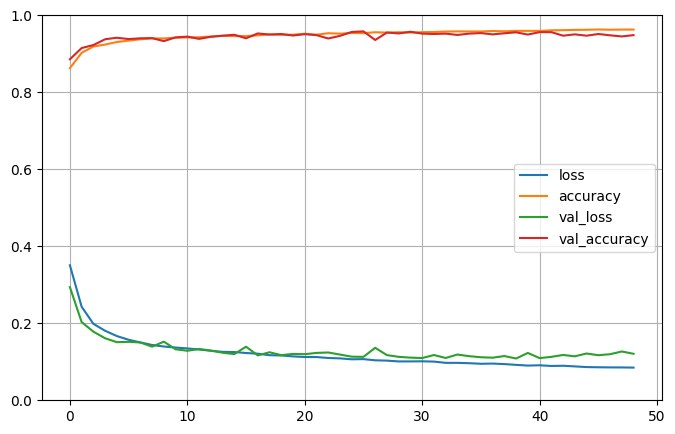

In [36]:
history = pipeline['classifier'].model.history.history
pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

deep_models.append(("Neural Network 1", model_1))

In [37]:
from keras.callbacks import Callback
from keras.layers import BatchNormalization, Dropout, Activation

keras.backend.clear_session()

model_2 = Sequential()
model_2.add(Dense(100, use_bias=False, input_shape=(27,)))
model_2.add(BatchNormalization())
model_2.add(Activation("elu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(50, use_bias=False))
model_2.add(BatchNormalization())
model_2.add(Activation("elu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, use_bias=False))
model_2.add(BatchNormalization())
model_2.add(Activation("elu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(1, activation="sigmoid"))
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=model_2, epochs=1000, batch_size=32, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)]))
])

pipeline.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/1000
579/579 [==============================] - 9s 9ms/step - loss: 0.3909 - accuracy: 0.8430 - val_loss: 0.2962 - val_accuracy: 0.8828
Epoch 2/1000
579/579 [==============================] - 5s 9ms/step - loss: 0.3263 - accuracy: 0.8753 - val_loss: 0.2437 - val_accuracy: 0.9090
Epoch 3/1000
579/579 [==============================] - 6s 11ms/step - loss: 0.3028 - accuracy: 0.8824 - val_loss: 0.2172 - val_accuracy: 0.9129
Epoch 4/1000
579/579 [==============================] - 5s 8ms/step - loss: 0.2929 - accuracy: 0.8855 - val_loss: 0.2086 - val_accuracy: 0.9168
Epoch 5/1000
579/579 [==============================] - 6s 10ms/step - loss: 0.2800 - accuracy: 0.8912 - val_loss: 0.1962 - val_accuracy: 0.9168
Epoch 6/1000
579/579 [==============================] - 6s 10ms/step - loss: 0.2721 - accuracy: 0.8953 - val_loss: 0.1891 - val_accuracy: 0.9212
Epoch 7/1000
579/579 [==============================] - 5s 9ms/step - loss: 0.2668 - accuracy: 0.8936 - val_loss: 0.1903 - val_accura

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Infl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier',
                 KerasClassifier(batch_size=32, callbacks=[<keras.callbacks.EarlyStopping object at 0x7fac26040160>], epochs=1000, model=<keras.engine.sequential.Sequential object at 0x7fac260062c0>))])

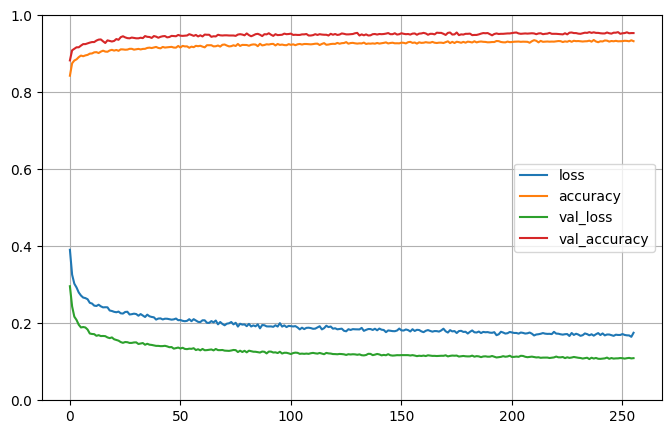

In [38]:
history_2 = pipeline['classifier'].model.history.history
pd.DataFrame(history_2).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

deep_models.append(("Neural Network 2", model_2))

# **Models comparison**

In [39]:
def get_recall_score(deep_model, X_test_scaled, y_test):
    recall_keras = keras.metrics.Recall()
    recall_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return recall_keras.result().numpy()

def get_precision_score(deep_model, X_test_scaled, y_test):
    precision_keras = keras.metrics.Precision()
    precision_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return precision_keras.result().numpy()

def get_accuracy_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.Accuracy()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

def get_f1_score(deep_model, X_test_scaled, y_test):
    pres = get_precision_score(deep_model, X_test_scaled, y_test)
    rec = get_recall_score(deep_model, X_test_scaled, y_test)
    return (2 * pres * rec) / (pres + rec)

def get_roc_auc_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.AUC()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

In [51]:
from sklearn import metrics

models = []
models.append(('Logistic regression', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('SVM rbf', grid_4.best_estimator_))
models.append(('KNeighborsClassifier', grid_5.best_estimator_))
models.append(('DecisionTreeClassifier', grid_6.best_estimator_))
models.append(('RandomForestClassifier', grid_7.best_estimator_))
models.append(('BaggingClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
models.append(('XGBClassifier', grid_11.best_estimator_))

X_train_results= preprocess_pipeline.fit_transform(X_train)
X_test_scaled = preprocess_pipeline.transform(X_test)

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

for name, model in deep_models:
    precision_score.append(get_precision_score(model, X_test_scaled, y_test))
    recall_score.append(get_recall_score(model, X_test_scaled, y_test))
    f1_score.append(get_f1_score(model, X_test_scaled, y_test))
    accuracy_score.append(get_accuracy_score(model, X_test_scaled, y_test))
    roc_auc_score.append(get_roc_auc_score(model, X_test_scaled, y_test))

d = {
    'precision_score': precision_score,
    'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
    'roc_auc_score': roc_auc_score
     }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Name', value=[
    'Logistic regression', 'SVM linear', 'SVM poly', 'SVM rbf', 'KNeighbors', 'DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 'GradientBoosting', 'XGB', 'Neural Network 1', 'Neural Network 2'
    ])
df

161/161 [==============================] - 0s 2ms/step


,Name,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,Logistic regression,0.869526,0.833042,0.850893,0.870014,0.866363
1,SVM linear,0.869945,0.827360,0.848118,0.868068,0.864048
2,SVM poly,0.954422,0.924388,0.939165,0.946682,0.944481
3,SVM rbf,0.957581,0.927448,0.942274,0.949406,0.947238
4,KNeighbors,0.947801,0.857080,0.900161,0.915353,0.909599
5,DecisionTree,0.948463,0.916958,0.932444,0.940845,0.938486
6,RandomForest,0.954095,0.926573,0.940133,0.947461,0.945398
7,Bagging,0.956659,0.926136,0.941150,0.948434,0.946232
8,AdaBoost,0.923351,0.905594,0.914387,0.924499,0.922632
9,GradientBoosting,0.963768,0.930070,0.946619,0.953298,0.951005


<Axes: title={'center': 'Precision scores'}, xlabel='Name', ylabel='precision_score'>

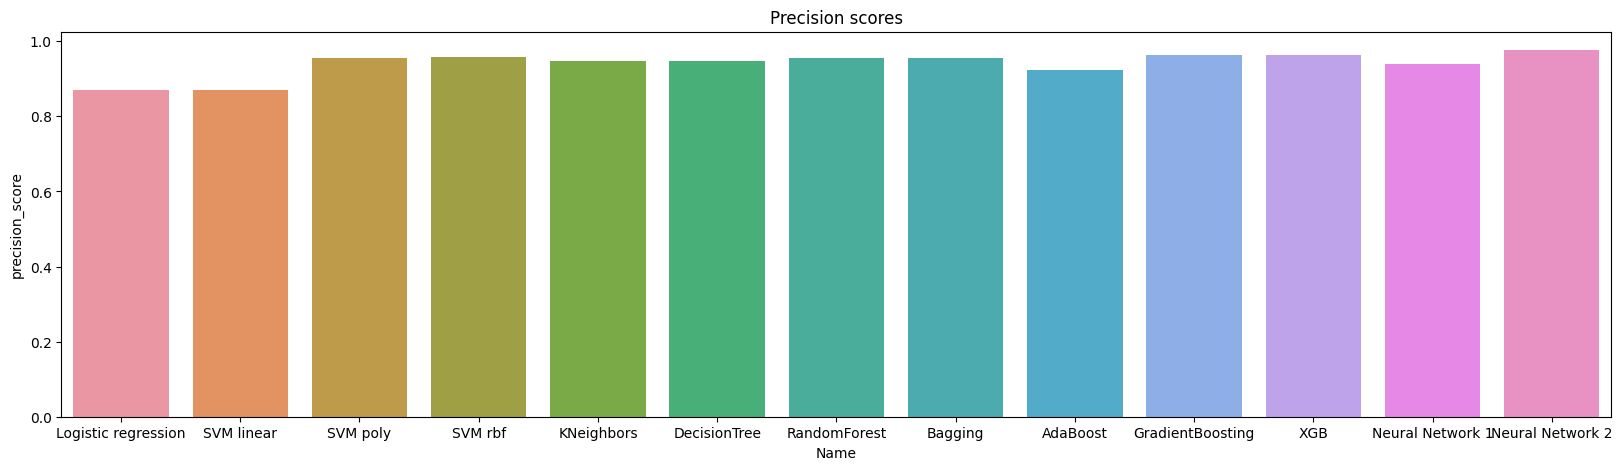

In [53]:
plt.title('Precision scores')
sns.barplot(data=df, y='precision_score', x='Name')

<Axes: title={'center': 'Recall scores'}, xlabel='Name', ylabel='recall_score'>

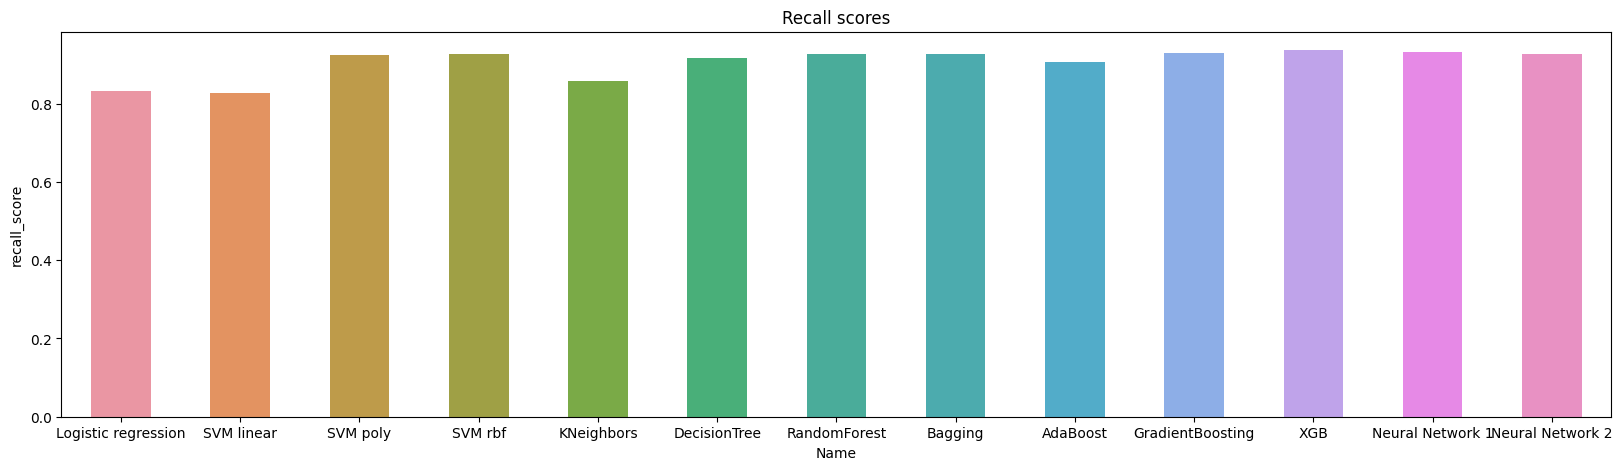

In [54]:
plt.title('Recall scores')
sns.barplot(data=df, y='recall_score', x='Name', width=0.5)

<Axes: title={'center': 'F1 scores'}, xlabel='Name', ylabel='f1_score'>

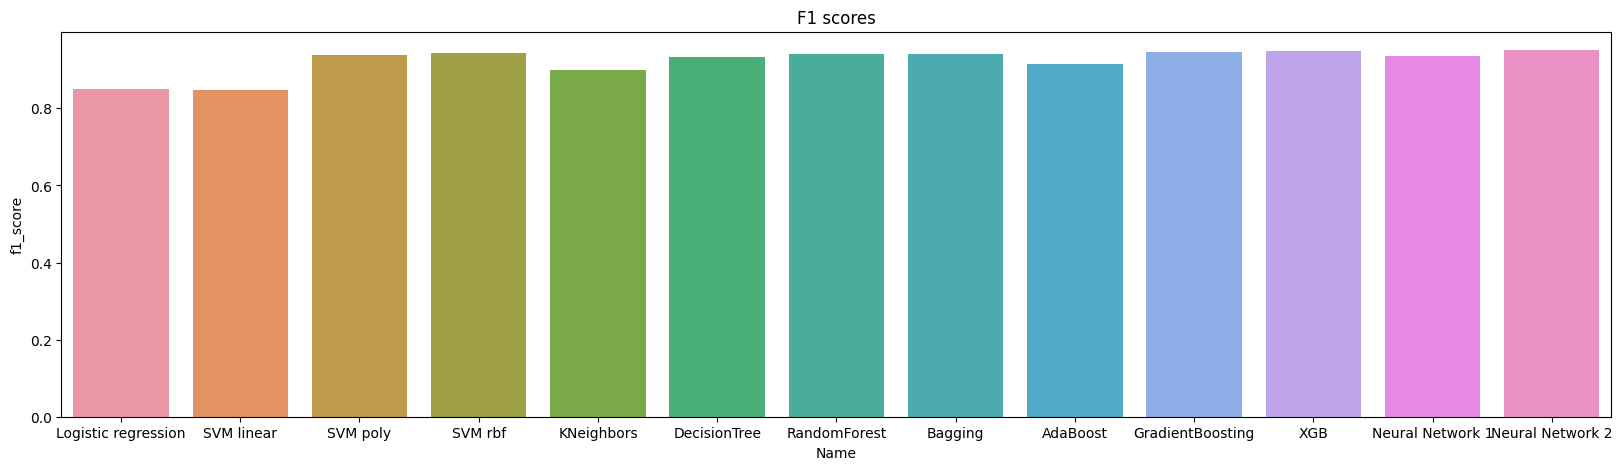

In [55]:
plt.title('F1 scores')
sns.barplot(data=df, y='f1_score', x='Name')

<Axes: title={'center': 'Accuracy scores'}, xlabel='Name', ylabel='accuracy_score'>

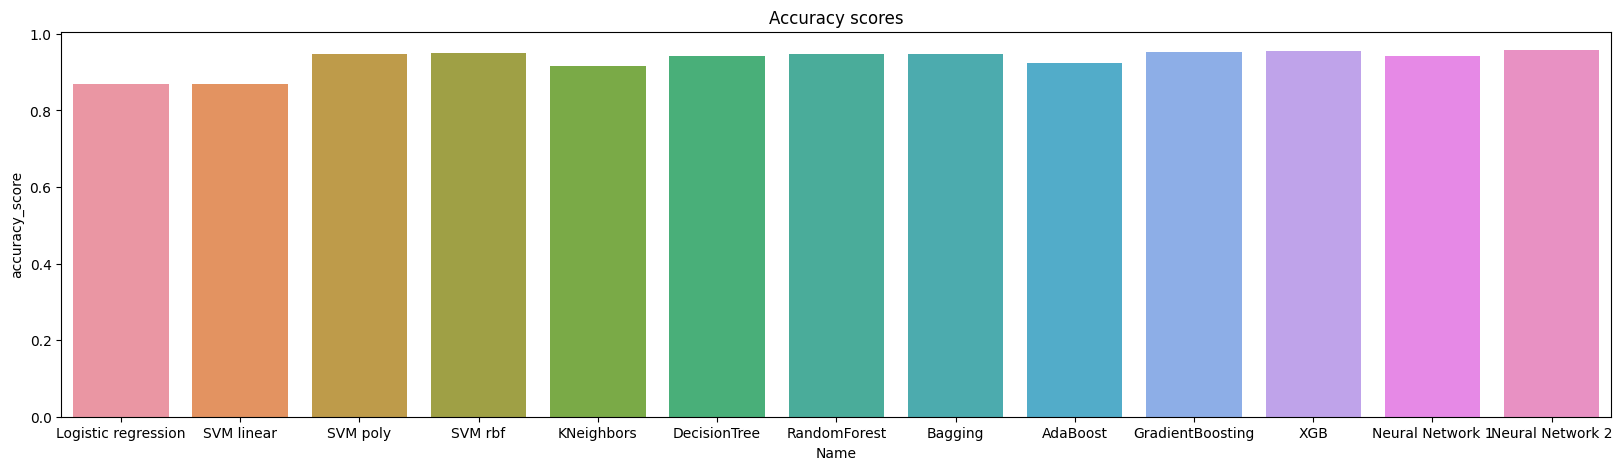

In [56]:
plt.title('Accuracy scores')
sns.barplot(data=df, y='accuracy_score', x='Name')

<Axes: title={'center': 'Roc auc scores'}, xlabel='Name', ylabel='roc_auc_score'>

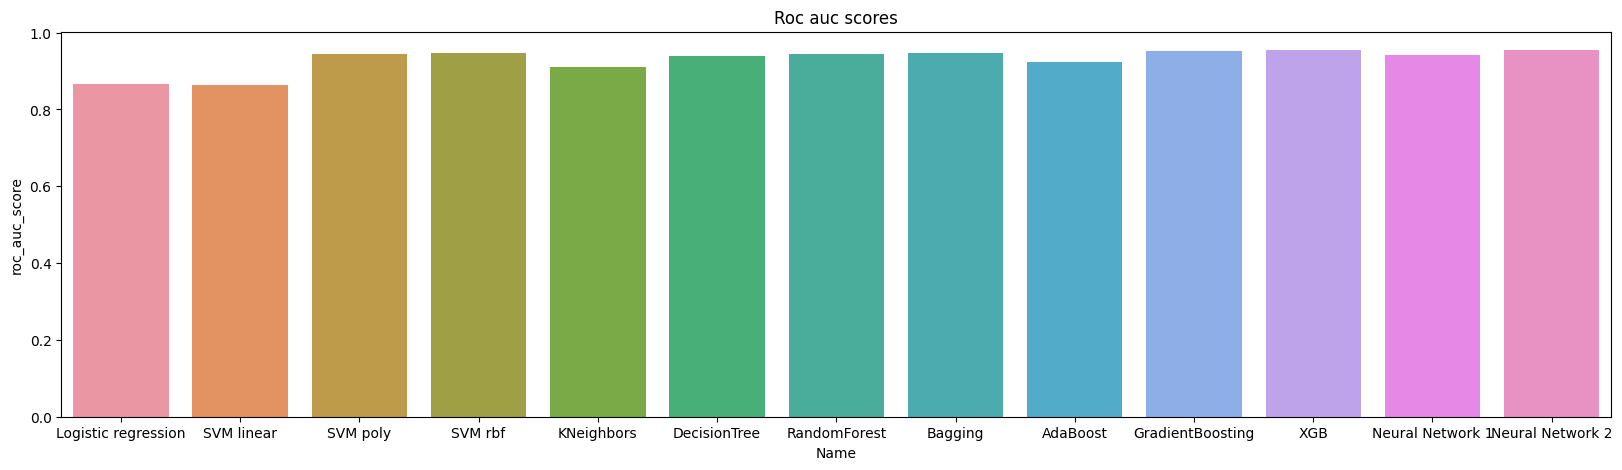

In [57]:
plt.title('Roc auc scores')
sns.barplot(data=df, y='roc_auc_score', x='Name')

**Confusion Matrixes**

Logistic regression


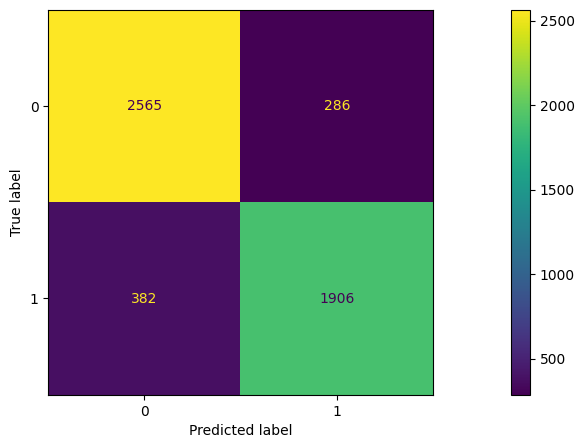






SVM linear


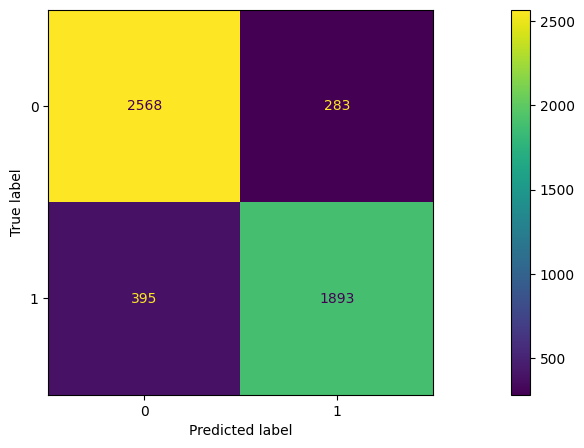






SVM poly


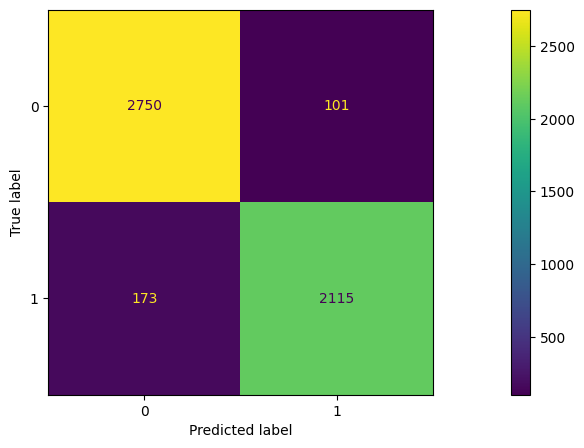






SVM rbf


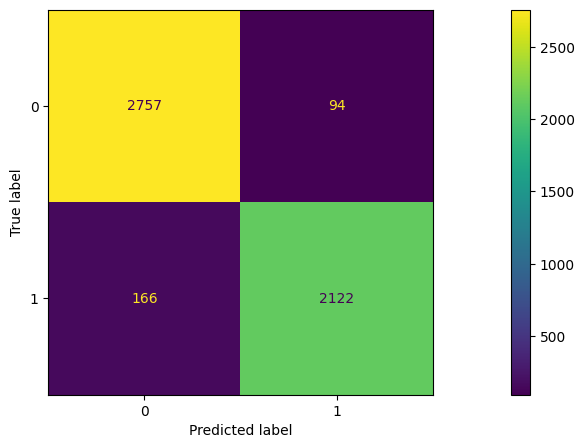






KNeighborsClassifier


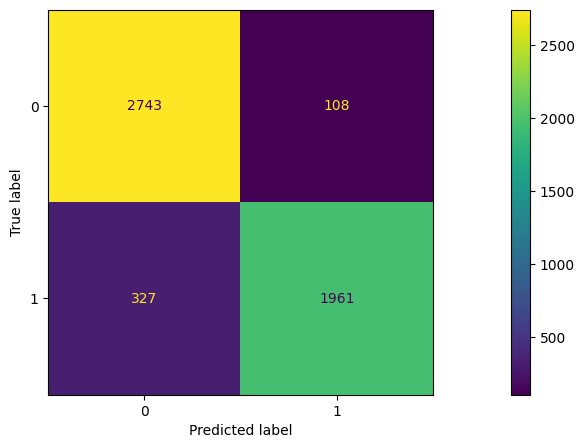






DecisionTreeClassifier


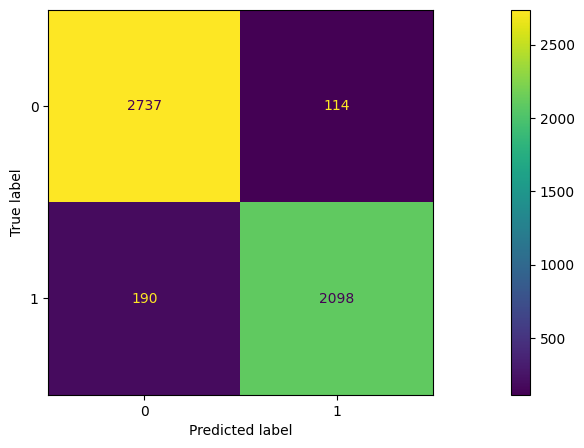






RandomForestClassifier


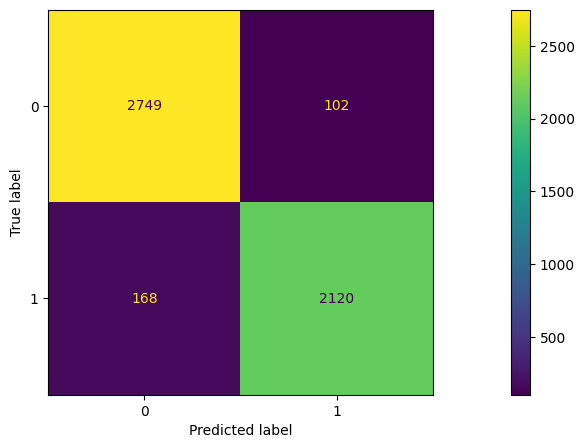






BaggingClassifier


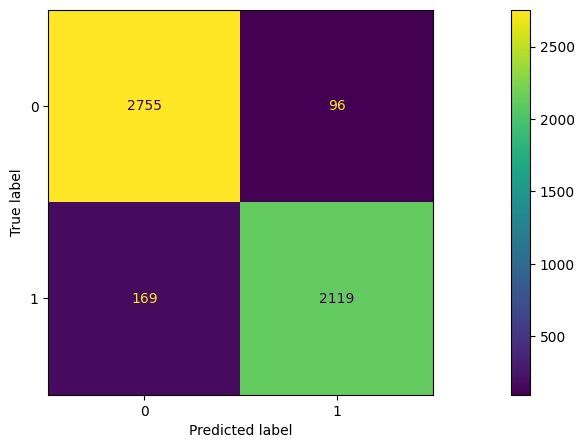






AdaBoostClassifier


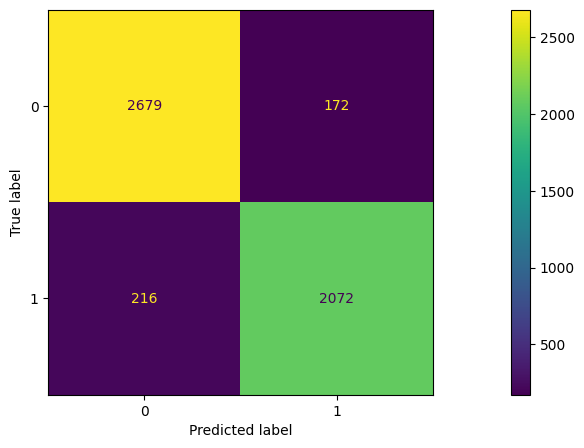






GradientBoostingClassifier


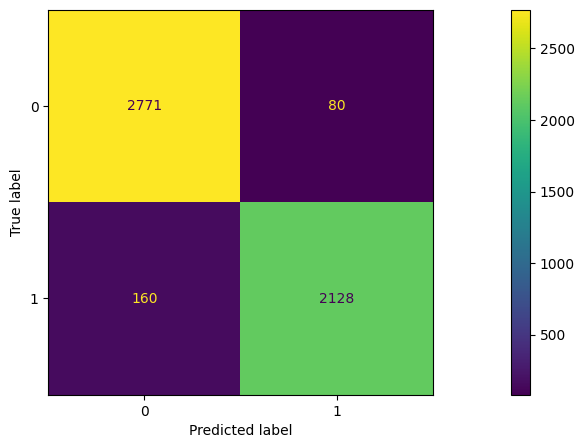






XGBClassifier


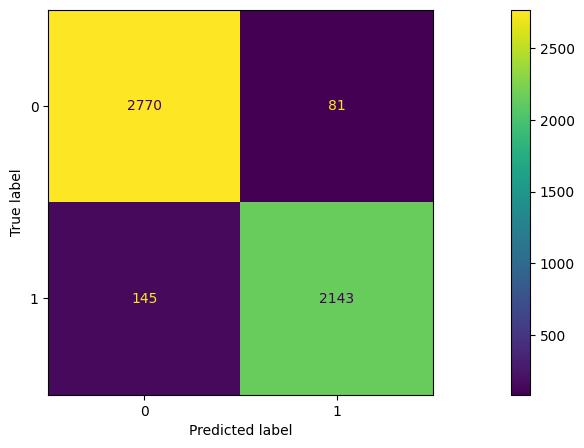






Neural Network 1
161/161 [==============================] - 0s 2ms/step


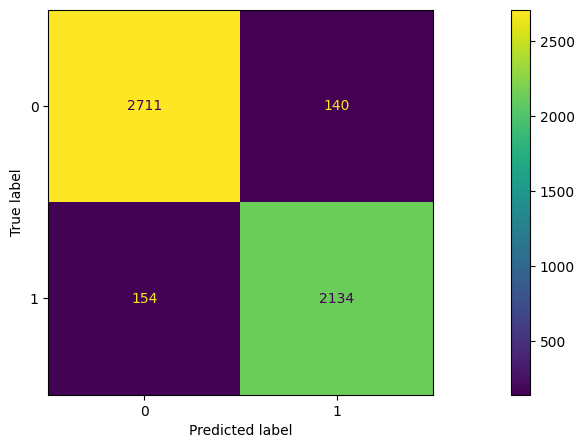






Neural Network 2
161/161 [==============================] - 0s 2ms/step


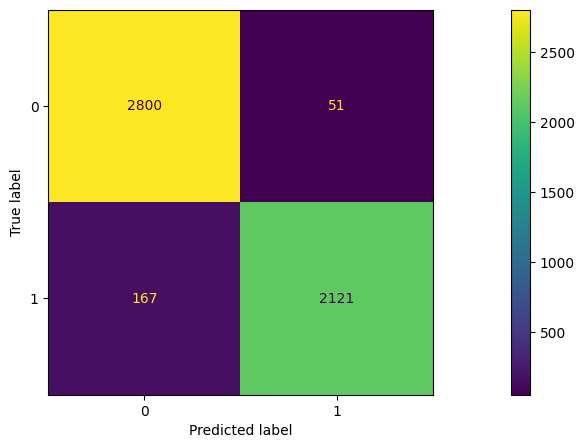

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

for name, model in models:
  print("\033[1m" + name + "\033[0m")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.show()
  print('\n\n\n\n')

for name, model in deep_models:
  print("\033[1m" + name + "\033[0m")
  y_pred= (model.predict(X_test_scaled) > 0.5).astype("int32")
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap="viridis")
  plt.show()
  print('\n\n\n\n')

# **Summary**

Among the models tested, several demonstrated strong performance across multiple metrics. SVM poly, SVM rbf, Random Forest, Bagging, Gradient Boosting, XGB, Neural Network 1, and Neural Network 2 consistently achieved high scores. These models showcased a balance between accurately predicting positive and negative instances, as reflected in their precision and recall scores.

Ensemble methods, such as Random Forest, Bagging, Gradient Boosting, and XGB, proved effective, emphasizing the benefit of combining multiple models for improved performance.

Neural Network 2 stood out with its high precision and accuracy scores, indicating its potential for accurate prediction.